### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from IPython.display import Image
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

### Reading Train Dataset

In [2]:
df=pd.read_csv("/home/pavankumar/data_sci_dec/internship_datasets/Project-Housing_splitted/train.csv")
df.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     10   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2007        WD         Normal     128000  
1   2007        WD         Normal     268000  

[2 rows x 81 columns]

### Shape and Information of Data

In [3]:
print(f"Number of Rows :- {df.shape[0]}\nNumber of Columns :- {df.shape[1]}")

Number of Rows :- 1168
Number of Columns :- 81


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

#### Dataset having null values with (object, int, float) data type.

## Handeling Null values : 

### Null values in Heatmap

In [5]:
na_sum=pd.DataFrame(df.isna().sum())
na_sum.columns=['Sum of Null']
na_sum=na_sum[na_sum['Sum of Null'] !=0]
na_sum

Sum of Null
LotFrontage           214
Alley                1091
MasVnrType              7
MasVnrArea              7
BsmtQual               30
BsmtCond               30
BsmtExposure           31
BsmtFinType1           30
BsmtFinType2           31
FireplaceQu           551
GarageType             64
GarageYrBlt            64
GarageFinish           64
GarageQual             64
GarageCond             64
PoolQC               1161
Fence                 931
MiscFeature          1124

In [6]:
df[list(na_sum.index)].isna().sum()

LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

<AxesSubplot:>

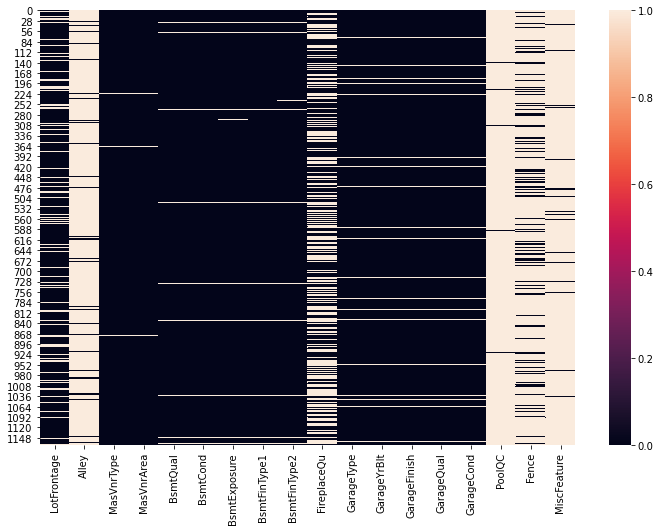

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df[list(na_sum.index)].isna())

##### Heatmap showing quantity of null values present in all column those have null values

#### Observation:

Columns: Alley, PooIQC, Fence, MiscFeature having high number of null values. If we handel this column with some value this will not give proper meaning beacuse imputing null values are imaginary or close to real word/number but it was an imaginary. If we impute more number of imaginary will not give proper prediction.

At this situation one of way to drop those columns but here from the data describtion. We got an information that in Alley wherever blank are there it means there is no alley present to that property. Same as "PoolQc" has no  pool present to that property. "Fence" , "MiscFeature" also not available to that property.

Rather dropping the columns filling the null values with some text.

In [8]:
df["Alley"].replace(np.nan,"No Alley",inplace=True)

In [9]:
df["PoolQC"].replace(np.nan,"No Pool Present",inplace=True)

In [10]:
df["Fence"].replace(np.nan,"No Fence",inplace=True)

In [11]:
df["MiscFeature"].replace(np.nan,"All Covered",inplace=True)

In [12]:
for name in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    df[name].replace(np.nan,"No Basement",inplace=True)

In [13]:
for name in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    df[name].replace(np.nan,"No Garage",inplace=True)

In [14]:
df['GarageYrBlt'].replace(np.nan,int(0),inplace=True)

In [15]:
df['FireplaceQu'].replace(np.nan,'No Fireplace',inplace=True)

<AxesSubplot:>

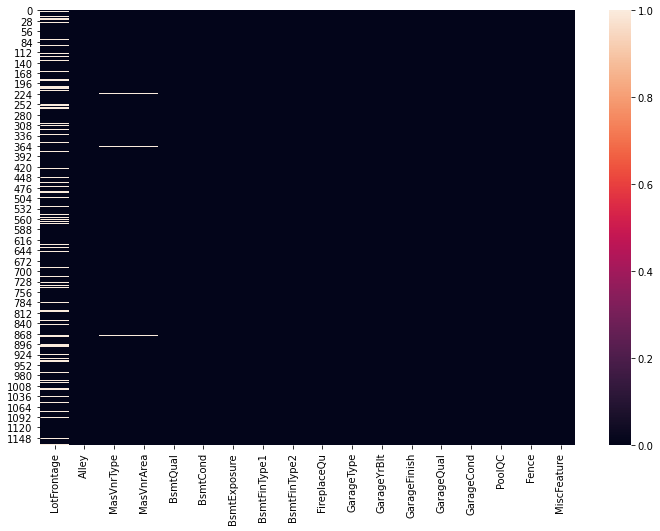

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df[list(na_sum.index)].isna())

In [17]:
df[pd.isna(df['MasVnrType'])].loc[:,['MasVnrType','MasVnrArea','SalePrice']]

MasVnrType  MasVnrArea  SalePrice
68         NaN         NaN     200624
78         NaN         NaN     465000
99         NaN         NaN     205950
185        NaN         NaN     182000
224        NaN         NaN     199900
367        NaN         NaN     237000
874        NaN         NaN     216500

In [18]:
df[pd.isna(df['MasVnrType'])]['SalePrice'].mean()

243853.42857142858

<AxesSubplot:xlabel='SalePrice'>

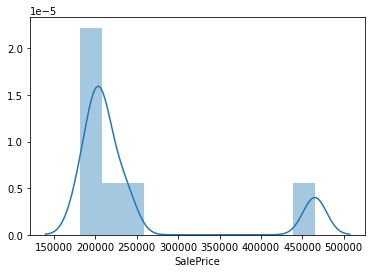

In [19]:
sns.distplot(df[pd.isna(df['MasVnrType'])]['SalePrice'])

In [20]:
df[df['MasVnrType']=="None"]['SalePrice'].mean()

158226.78735632185

<AxesSubplot:xlabel='SalePrice'>

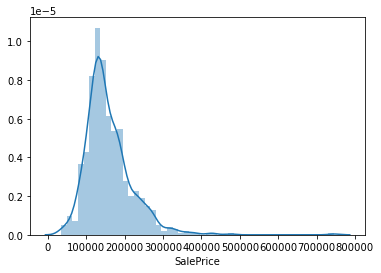

In [21]:
sns.distplot(df[df['MasVnrType']=="None"]['SalePrice'])

In [22]:
df[df['MasVnrType']=="None"].loc[:,['MasVnrType','MasVnrArea','SalePrice']]

MasVnrType  MasVnrArea  SalePrice
0          None         0.0     128000
1          None         0.0     268000
2          None         0.0     269790
5          None         0.0     219210
8          None         0.0     140000
...         ...         ...        ...
1162       None         0.0      58500
1164       None         0.0     108000
1165       None         0.0     148500
1166       None         0.0      40000
1167       None         0.0     183200

[696 rows x 3 columns]

In [23]:
df[df['MasVnrType']=="None"]['MasVnrArea'].value_counts()

0.0      691
1.0        2
312.0      1
344.0      1
288.0      1
Name: MasVnrArea, dtype: int64

In [24]:
df[(df['MasVnrType']=="None") & (df['MasVnrArea']!=0.0)].loc[:,['MasVnrType','MasVnrArea','SalePrice','Id']]

MasVnrType  MasVnrArea  SalePrice    Id
32         None         1.0     190000  1231
495        None       288.0     165150   625
624        None       312.0     125000  1335
975        None         1.0     114500   774
1161       None       344.0     225000  1301

##### Masonry veneer type is None still Masonry Area contains in this  Id's [1231,625,1335,774,1301]

In [25]:
df['MasVnrType'].replace(np.nan,'None',inplace=True)

df['MasVnrArea'].replace(np.nan,0.0,inplace=True)

<AxesSubplot:>

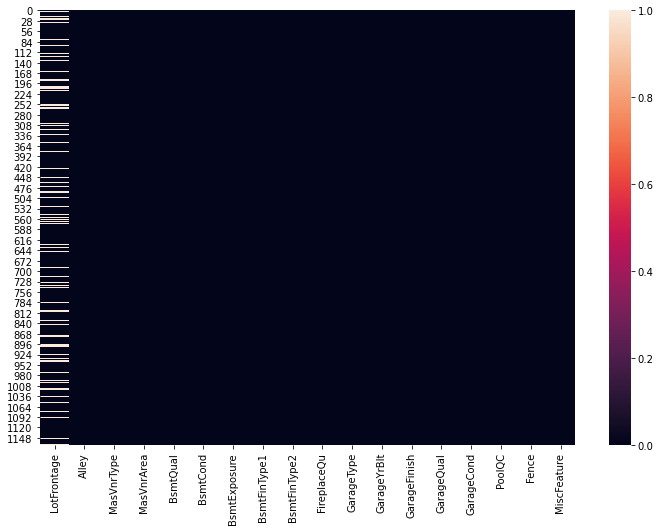

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df[list(na_sum.index)].isna())

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

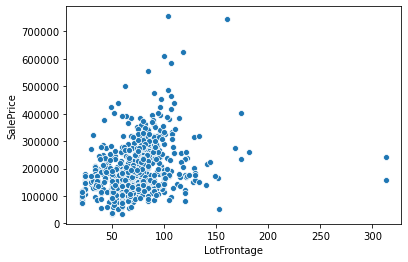

In [27]:
sns.scatterplot(x=df['LotFrontage'],y=df['SalePrice'])

In [28]:
df['LotFrontage'].mean()

70.98846960167715

In [29]:
df['SalePrice'].mean()

181477.0059931507

#### Rather Imputing null values in "LotFrontage" with a mean. I am using knn imputer after preprocessing the  data.  

## Exploratory Data Analysis : 

In [30]:
import atoti as tt
sess=tt.create_session()
sess_df=sess.read_csv("/home/pavankumar/data_sci_dec/internship_datasets/Project-Housing_splitted/train.csv")
cube=sess.create_cube(sess_df)
sess.url

'http://localhost:44841'

In [31]:
from pandas_ui import *

In [32]:
pdf=pandas_ui("/home/pavankumar/data_sci_dec/internship_datasets/Project-Housing_splitted/train.csv")

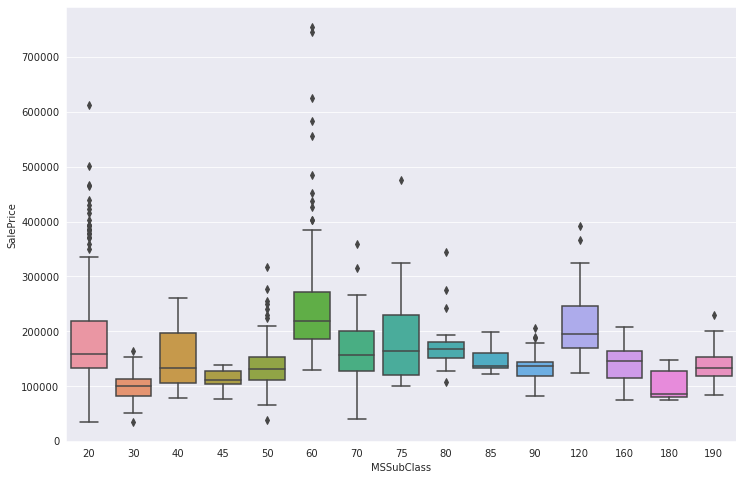

In [33]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(12,8))
ax=sns.boxplot(x='MSSubClass',y='SalePrice',data=df)

In [34]:
medians = df.groupby(['MSSubClass'])['SalePrice'].mean()

In [35]:
medians

MSSubClass
20     183321.390187
30      97774.057692
40     157500.000000
45     111960.000000
50     137626.194690
60     241584.430328
70     169231.509434
75     195571.428571
80     171607.441860
85     147800.000000
90     133871.609756
120    207705.289855
160    137861.382979
180    102750.000000
190    135303.846154
Name: SalePrice, dtype: float64

In [36]:
mean_df=pd.DataFrame(medians).sort_values("SalePrice")
mean_df['SalePrice']

MSSubClass
30      97774.057692
180    102750.000000
45     111960.000000
90     133871.609756
190    135303.846154
50     137626.194690
160    137861.382979
85     147800.000000
40     157500.000000
70     169231.509434
80     171607.441860
20     183321.390187
75     195571.428571
120    207705.289855
60     241584.430328
Name: SalePrice, dtype: float64

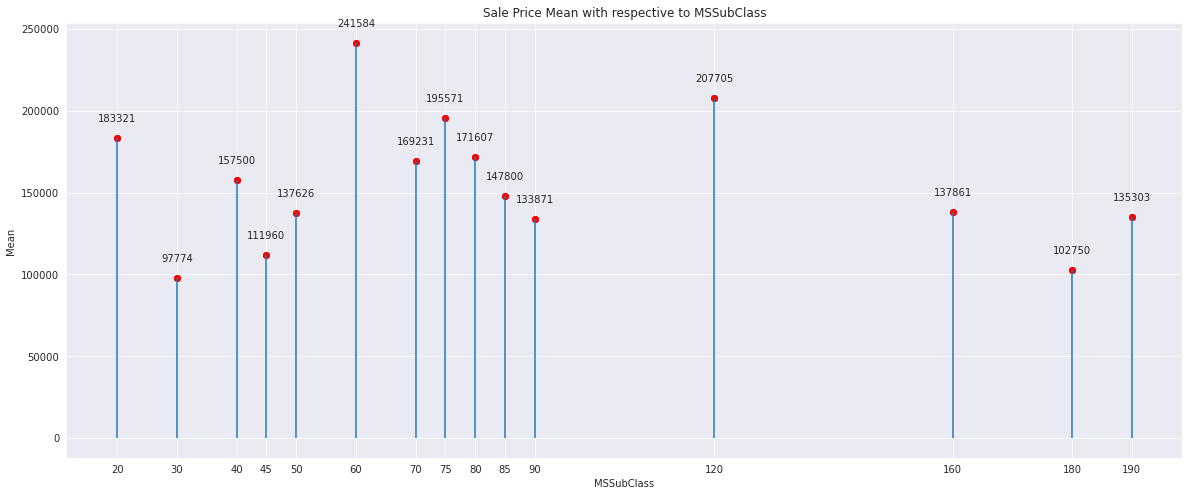

In [37]:
plt.figure(figsize=(20,8))
plt.xticks(pd.DataFrame(medians).index)
plt.xlabel("MSSubClass")
plt.ylabel("Mean ")
plt.title("Sale Price Mean with respective to MSSubClass")
ax=plt.scatter(pd.DataFrame(medians).index,pd.DataFrame(medians),color="r")
for i,j in zip(ax.axes.get_xticks(),medians):
    plt.vlines(i,i,j)
    plt.text(i,j+10000,int(j),ha="center")
plt.scatter(pd.DataFrame(medians).index,pd.DataFrame(medians),color="r")
plt.show()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES       
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

    30    1-STORY 1945 & OLDER
    The Mean of the sale price is too much low as compared to   
    20    1-STORY 1946 & NEWER ALL STYLES 
    30    1-STORY 1945 & OLDER : It was the lowest Sale price from all.
    *********
    
    Mean of Sale Price  is Heigh : 40    1-STORY W/FINISHED ATTIC ALL AGES
    Mean of Sale Price  is Average : 50    1-1/2 STORY FINISHED ALL AGES
    Mean of Sale Price  is LOw : 45    1-1/2 STORY - UNFINISHED ALL AGES
    ********
    
    70    2-STORY 1945 & OLDER
    Mean of sale price is low as compared to 
    75    2-1/2 STORY ALL AGES 
    It is lower than this
    60    2-STORY 1946 & NEWER : It is an heighest price from all.
    ********
    
    Mean Sale Price :80    SPLIT OR MULTI-LEVEL > 85    SPLIT FOYER > 90    DUPLEX - ALL STYLES AND AGES
    
    

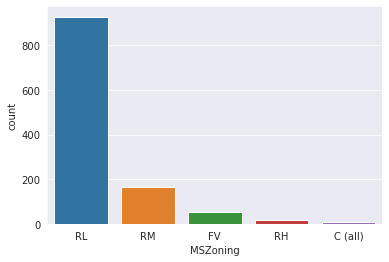

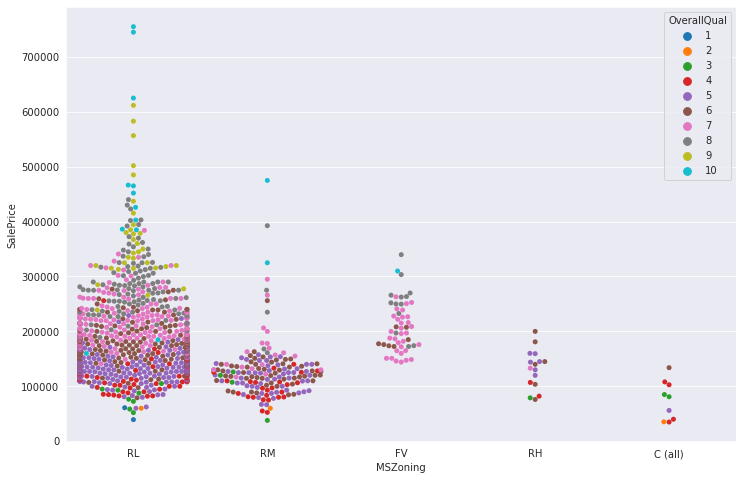

In [38]:
sns.countplot(df['MSZoning'])
plt.show()
sns.set_style(style='darkgrid')
plt.figure(figsize=(12,8))
sns.swarmplot(x='MSZoning',y='SalePrice',hue=df['OverallQual'],data=df)
plt.show()

#### MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium 
       
More number of houses are loacated in region:  RL	Residential Low Density

Some of houses are in region : RM	Residential Medium

FV	Floating Village Residential havine less number of houses and there price range between (144k to 340k)

RH	Residential High Density and c (all) are having less with low sale price.



#### OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
 From above Swarm plot we can see that while OverallQual is stepping up to 10 correspondingly Sale Price also increasing.
 
 Those haiving OverallQual 10,9 8 are having the sale price too much heigh we can also see in the plot. 
 
 Most of heigh prices houses are in "RL    Residential Low Density"
 
 Floating Village Residential are having OverallQual is :  6,7,8

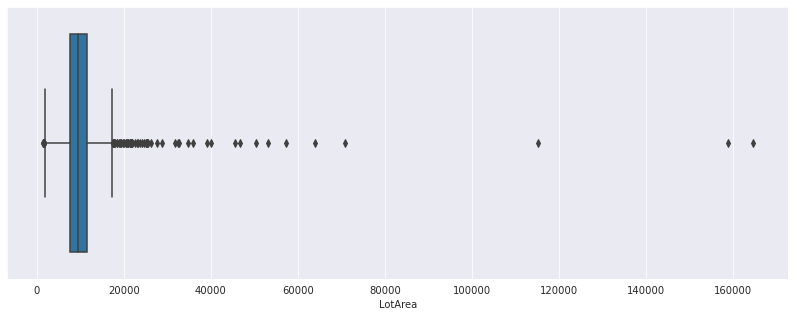

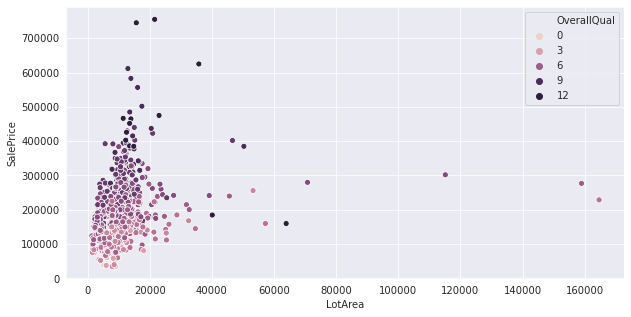

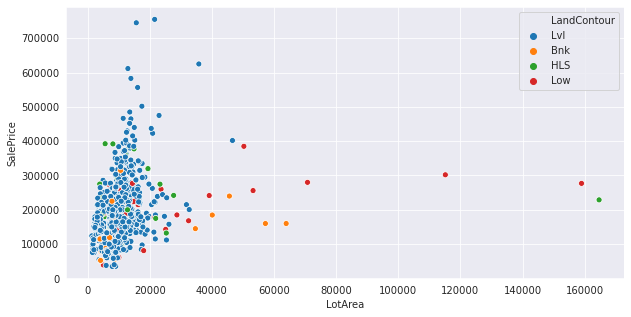

In [39]:
plt.figure(figsize=(14,5))
sns.boxplot(df['LotArea'])
plt.show()
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['LotArea'],y=df['SalePrice'],hue=df['OverallQual'])
plt.show()
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['LotArea'],y=df['SalePrice'],hue=df['LandContour'])
plt.show()

#### LotArea: Lot size in square feet

##### Observation  : 

Most of the Lot Area ranges in between 1680 to 17.21k 

While Lot Area increase sale price also slightly increasing and also sale price mostly increasing depends on the OverallQual.

In above Plot we can see some data points having Lot Area is too much heigh but sale price is not that much heigh beacause these data points have LandCounter is "LOW"==depression or "HLS"== Hillside - Significant slope from side to side.

In [40]:
pdf=pandas_ui("/home/pavankumar/data_sci_dec/internship_datasets/Project-Housing_splitted/train.csv")

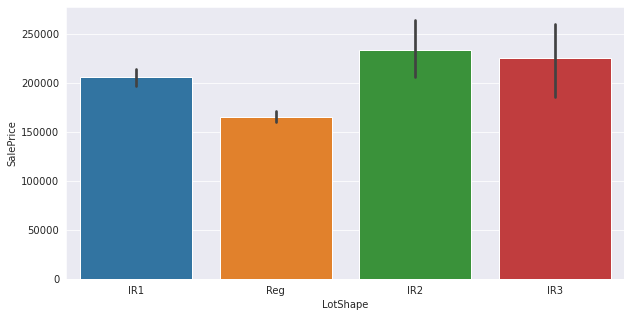

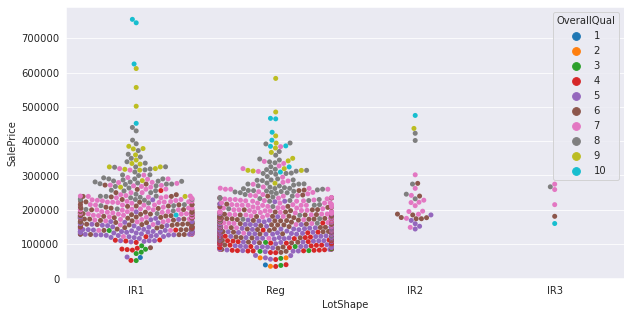

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['LotShape'],y=df['SalePrice'])
plt.show()
plt.figure(figsize=(10,5))
sns.swarmplot(x=df['LotShape'],y=df['SalePrice'],hue=df['OverallQual'])
plt.show()

#### LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
From above Plot we can see that more number of houses are in Regular shape or Slightly Irregular shape. But form this Sale price is not that much varing i.e increasing or decreasing.

From bar plot we can see that mean of sale price with respective to LotShape.


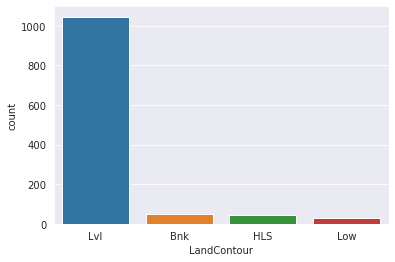

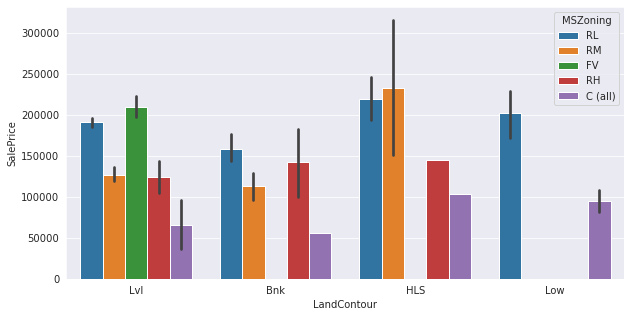

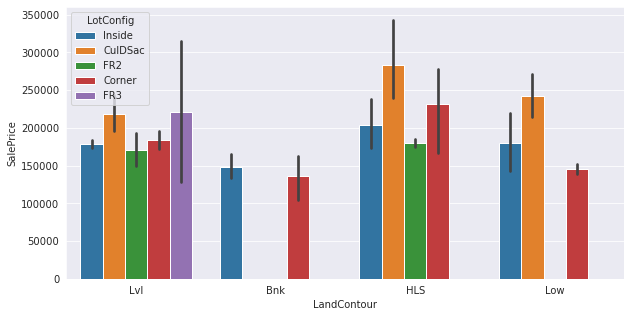

In [42]:
sns.countplot(df['LandContour'])
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(x=df['LandContour'],y=df['SalePrice'],hue=df['MSZoning'])
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(x=df['LandContour'],y=df['SalePrice'],hue=df['LotConfig'])
plt.show()

### LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
       
       
#### Observation : 

From above plot MSZoning (FV    Floating Village Residential) is present only in Near Flat/Level

Sale Price opproximatly equal's to all of the LandContour. 

It is not much affecting in increasing the sale price.

90% of the data of LandContour is in Lvl== Near Flat/Level

In [43]:
df['Utilities'].value_counts()

AllPub    1168
Name: Utilities, dtype: int64

#### Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	 all rows having this nly 
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only
       
#### Observation : 

Data set having only one category in "Utilities" i.e (AllPub)

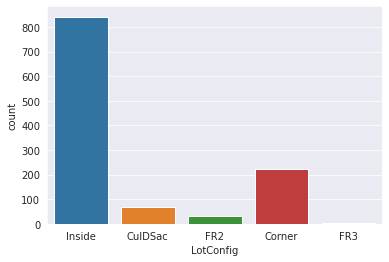

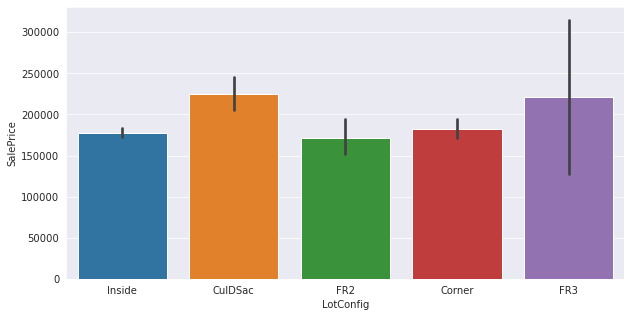

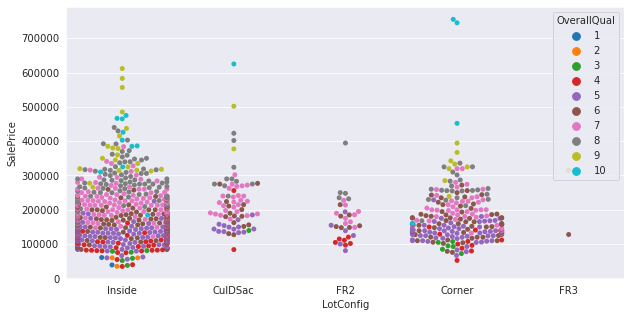

In [44]:
sns.countplot(df['LotConfig'])
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(x=df['LotConfig'],y=df['SalePrice'])
plt.show()
plt.figure(figsize=(10,5))
sns.swarmplot(x=df['LotConfig'],y=df['SalePrice'],hue=df['OverallQual'])
plt.show()

### LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
       
High number of houses are comes in categori i.e (Inside Lot).

It is also not that affecting sale price with all this categories. Mean of sale price is approx similar.

Outliers are having beacause that point are having OverallQual is Excellent.

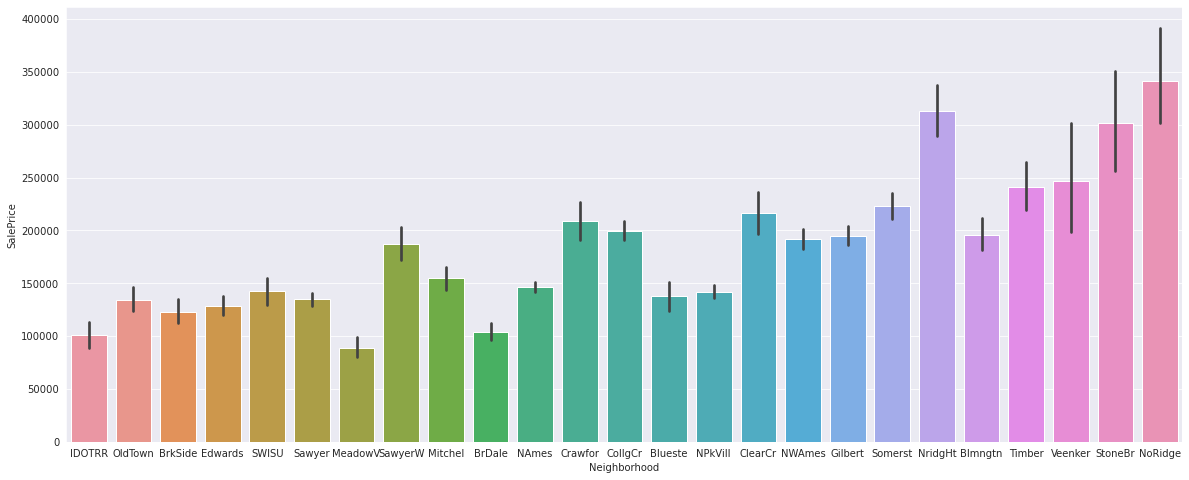

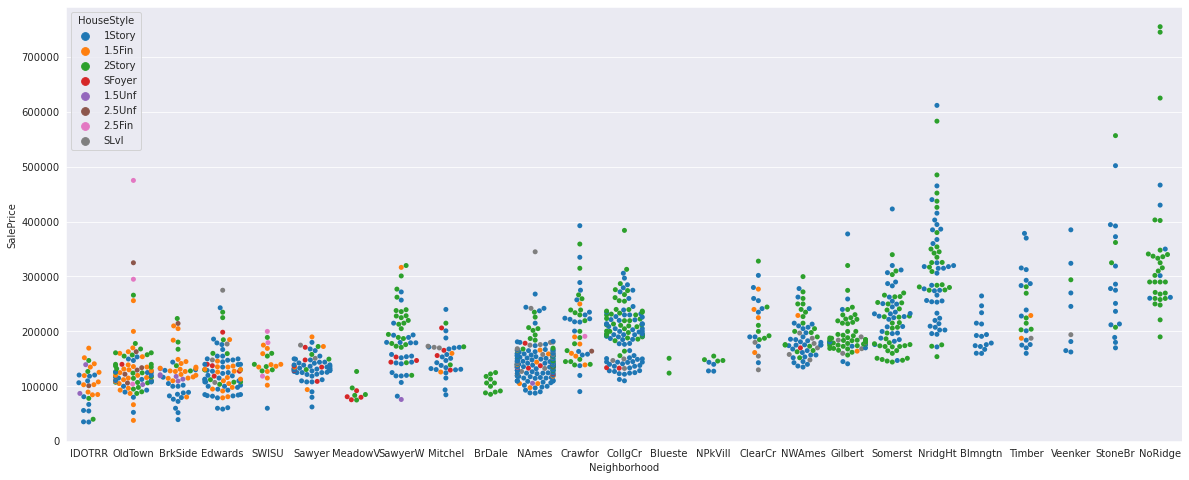

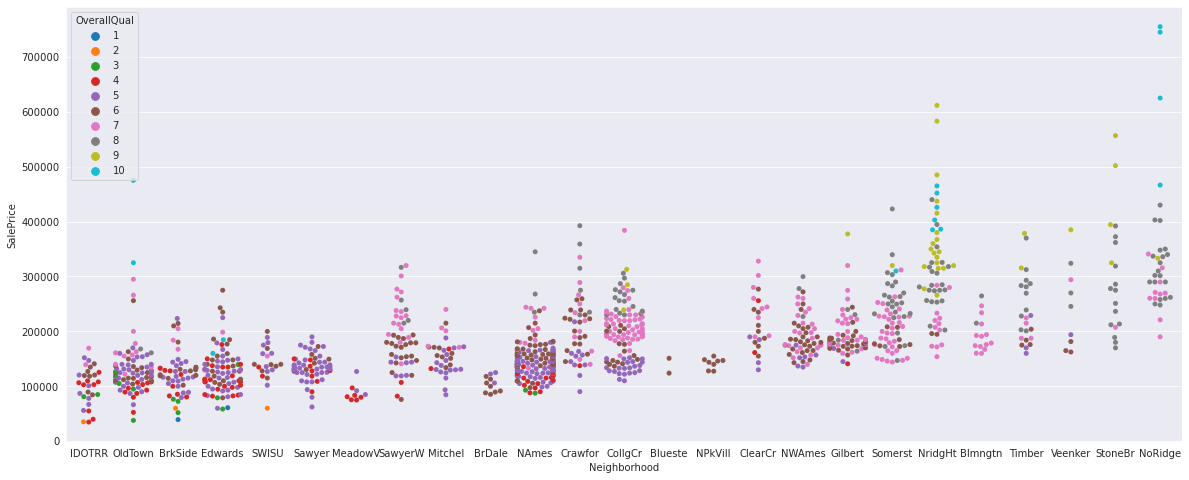

Text(0, 0, 'IDOTRR')
Text(1, 0, 'OldTown')
Text(2, 0, 'BrkSide')
Text(3, 0, 'Edwards')
Text(4, 0, 'SWISU')
Text(5, 0, 'Sawyer')
Text(6, 0, 'MeadowV')
Text(7, 0, 'SawyerW')
Text(8, 0, 'Mitchel')
Text(9, 0, 'BrDale')
Text(10, 0, 'NAmes')
Text(11, 0, 'Crawfor')
Text(12, 0, 'CollgCr')
Text(13, 0, 'Blueste')
Text(14, 0, 'NPkVill')
Text(15, 0, 'ClearCr')
Text(16, 0, 'NWAmes')
Text(17, 0, 'Gilbert')
Text(18, 0, 'Somerst')
Text(19, 0, 'NridgHt')
Text(20, 0, 'Blmngtn')
Text(21, 0, 'Timber')
Text(22, 0, 'Veenker')
Text(23, 0, 'StoneBr')
Text(24, 0, 'NoRidge')


In [45]:
plt.figure(figsize=(20,8))
sns.barplot(x='Neighborhood',y='SalePrice',data=df.sort_values(by='SalePrice'))
plt.show()

plt.figure(figsize=(20,8))
sns.swarmplot(x='Neighborhood',y='SalePrice',data=df.sort_values(by='SalePrice'),hue='HouseStyle')
plt.show()

plt.figure(figsize=(20,8))
ax=sns.swarmplot(x='Neighborhood',y='SalePrice',data=df.sort_values(by='SalePrice'),hue=df['OverallQual'])
plt.show()
for i in ax.get_xticklabels():
    print(i)

### Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
            
#### Observation : 

From above observatiopn we can see that sale price is increasing based on the Neighborhood.

And those Neighborhood having heigh prices mostly all the houses are 1 Story and 2 Story. From this we can also observed that 1 story and 2 story prices are having heigh.

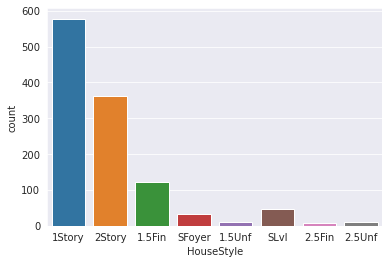

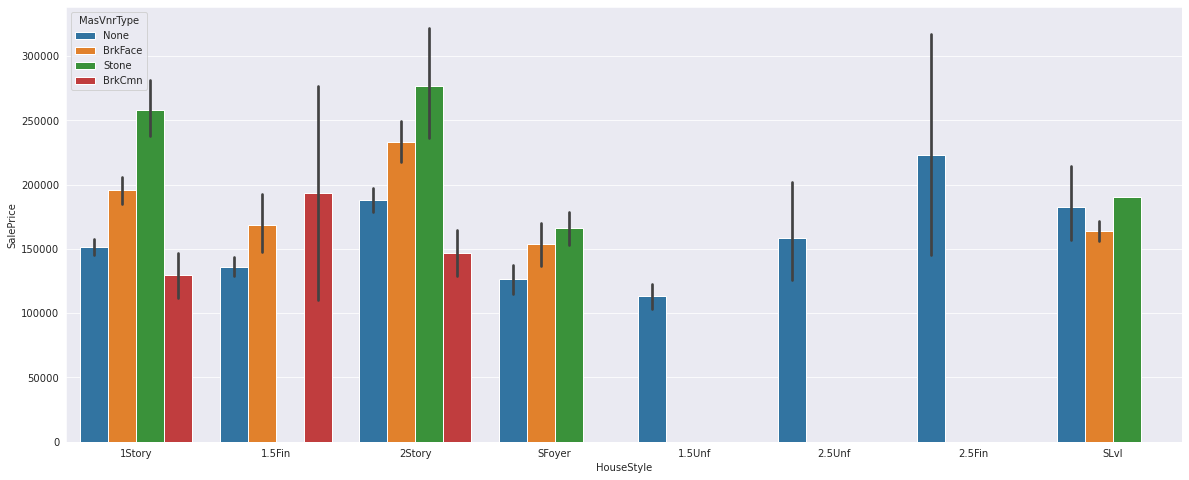

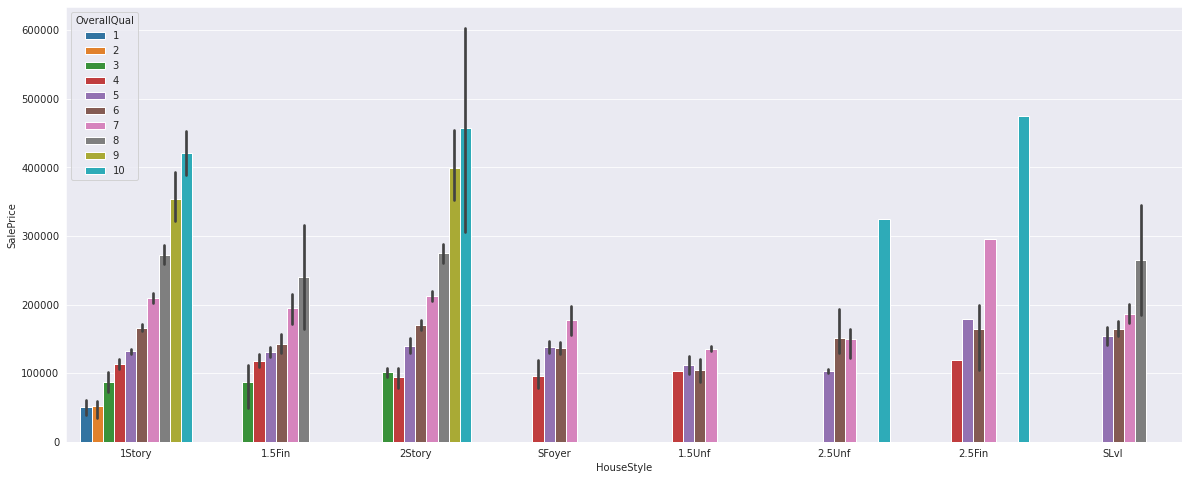

In [46]:
sns.countplot(df['HouseStyle'])
plt.show()
plt.figure(figsize=(20,8))
sns.barplot(x='HouseStyle',y='SalePrice',data=df.sort_values(by='SalePrice'),hue=df['MasVnrType'])
plt.show()
plt.figure(figsize=(20,8))
sns.barplot(x='HouseStyle',y='SalePrice',data=df.sort_values(by='SalePrice'),hue=df['OverallQual'])
plt.show()

### HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
#### Observation : 

    One story, Two story, Two and one-half story: 2nd level finished are having high sale price's and prices           are low where house style is ufinished.
    
    1,1.5,2 story price's are also heigh beacuse Masonry veneer type's are used in this type of houses. 
    
    Those who used Masonry veneer type== Stone & Brick Face there house price means slightly heigh as compared rest of all other types.

    Most of houses types are 1 and 2 story.
    
    This column is affecting the price of sale.
    

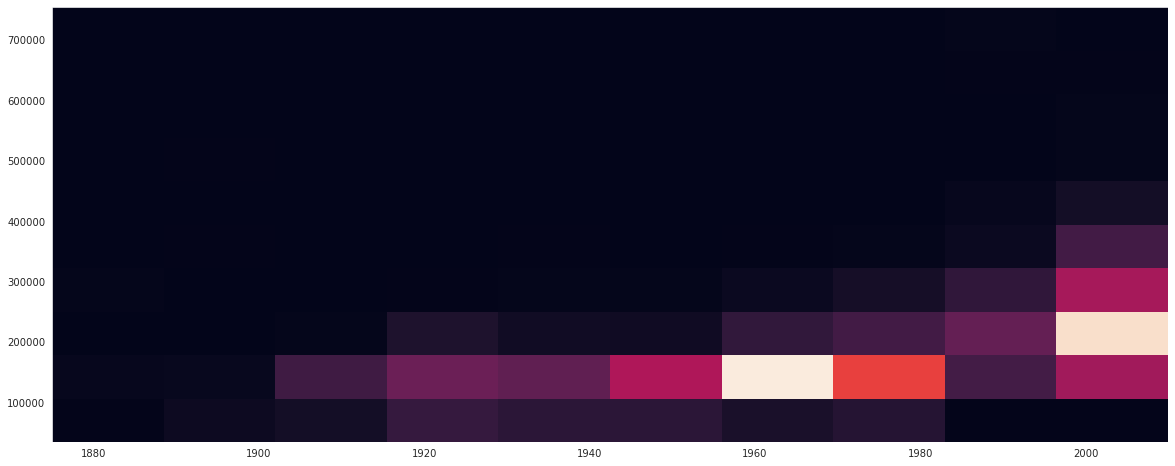

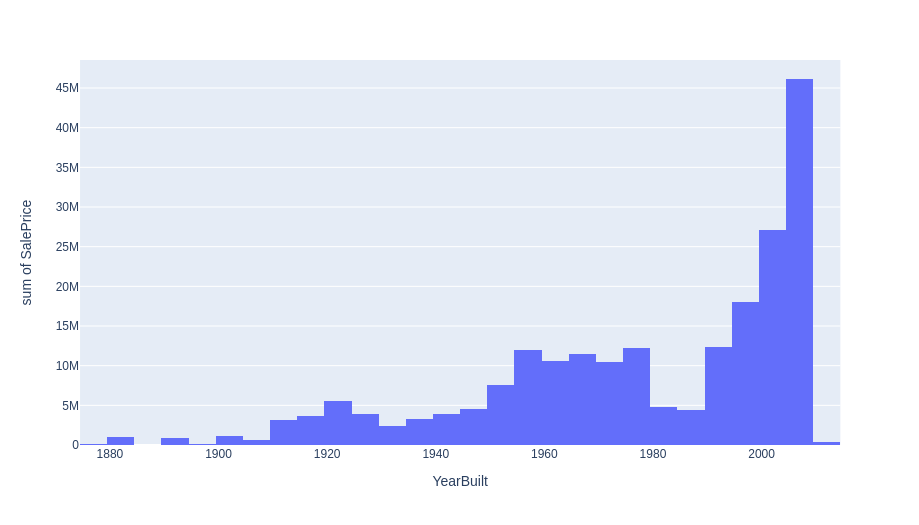

In [47]:
plt.figure(figsize=(20,8))
plt.hist2d(x=df['YearBuilt'],y=df['SalePrice'])
plt.show()
Image("/home/pavankumar/Downloads/newplot (23).png")

### YearBuilt: Original construction date

#### Observation : 
    From above we can see that Sale prices heigh those houses are buid in near to 2000's.
    
    Hence, we can say that newly buid houses price are heigh.
    
    This column aslo affecting the sale price of house.

In [48]:
pd.DataFrame(df['YearRemodAdd']-df['YearBuilt']).sort_values(by=0,ascending=False).head(20)

0
1104  123
192   122
655   121
299   111
713   107
372   106
642   104
378   103
103   101
884   100
90     98
389    96
650    95
636    94
640    93
1060   93
477    92
718    92
1125   90
1020   90

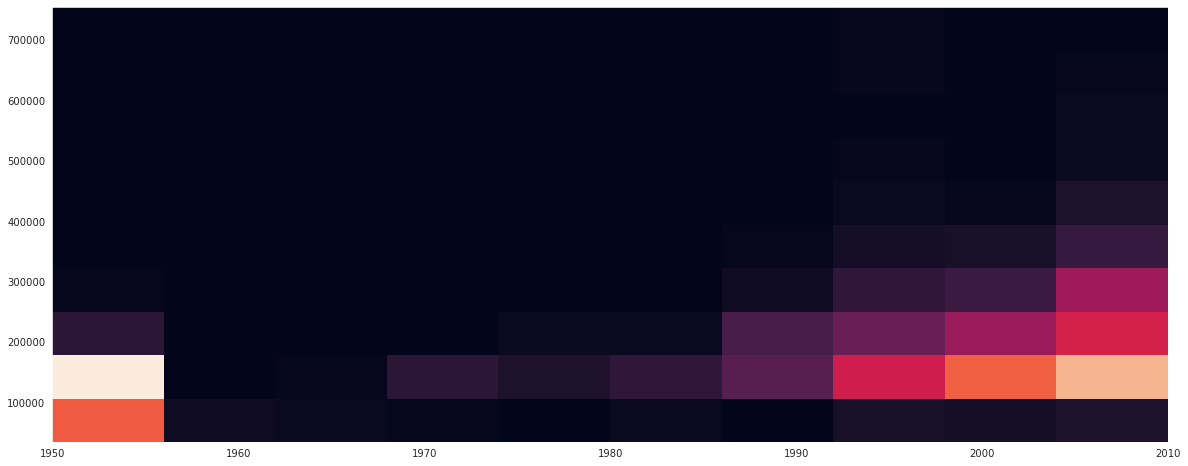

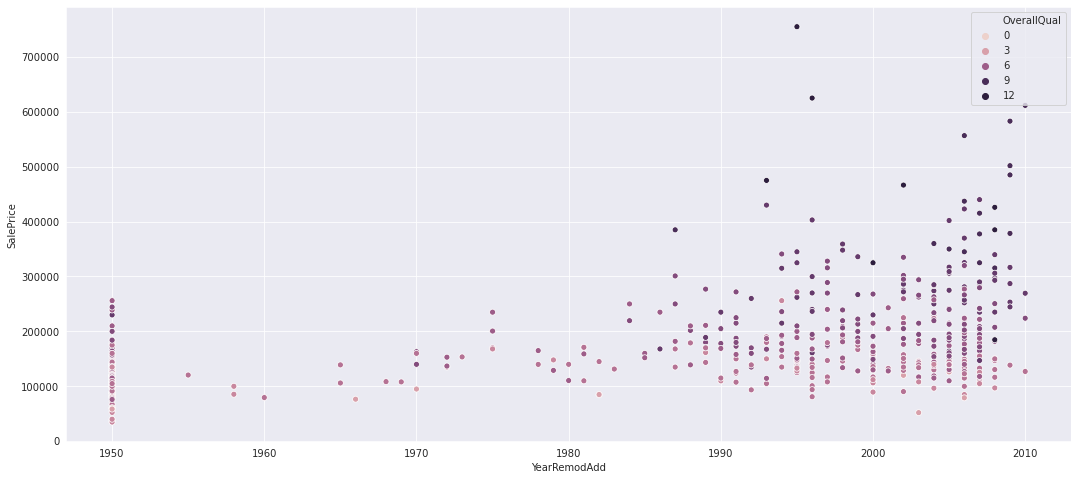

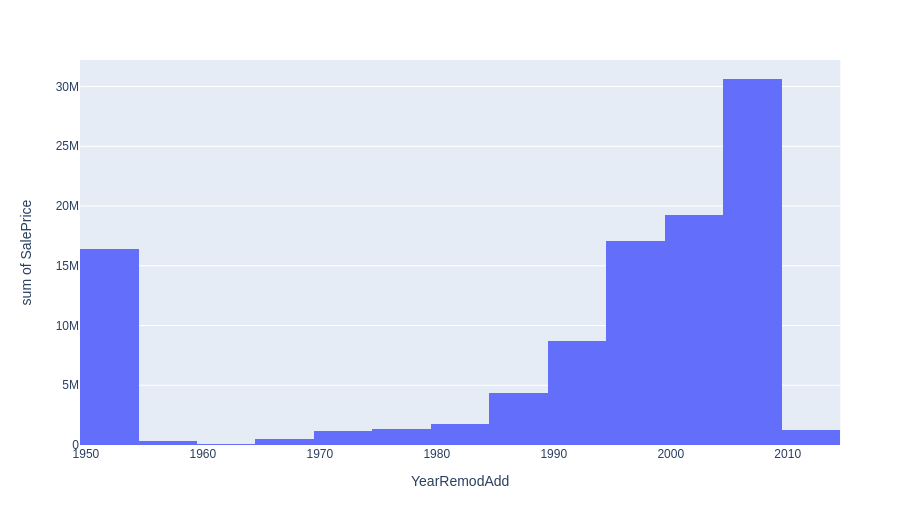

In [49]:
plt.figure(figsize=(20,8))
plt.hist2d(x='YearRemodAdd',y='SalePrice',data=df[(df['YearRemodAdd']-df['YearBuilt'])!=0])
plt.show()

plt.figure(figsize=(18,8))
sns.scatterplot(x='YearRemodAdd',y='SalePrice',hue=df['OverallQual'],data=df[(df['YearRemodAdd']-df['YearBuilt'])!=0])
plt.show()

Image("/home/pavankumar/Downloads/newplot (24).png")

In [50]:
df[((df['YearRemodAdd']-df['YearBuilt'])!=0) & df['YearRemodAdd'].isin([1950,1951,1952,1953,1954,1955])]['YearRemodAdd'].value_counts()

1950    138
1955      1
Name: YearRemodAdd, dtype: int64

### YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

#### Observation : 

    More number of houses are remodel from 1990 to 2010 and there sale price's are gradually increasred from   1990 -2010.
    
    And also some of house are remodel where year in 1950. As above observatio sale price also depending on the OverallCal and OverallCond
    
    

In [51]:
tst=df ## Creating duplicate test dataframe

In [52]:
tst["remod_afr_yrbuilt"]=df['YearRemodAdd']-df['YearBuilt']  ## Creating new column in test data

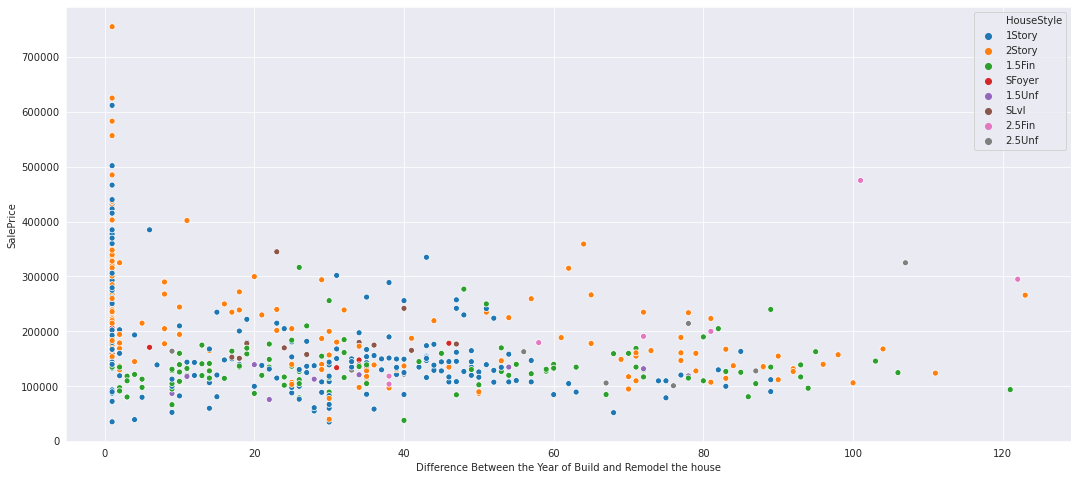

In [53]:
plt.figure(figsize=(18,8))
ax=sns.scatterplot(x='remod_afr_yrbuilt',y='SalePrice',hue=tst['HouseStyle'],data=tst[tst['remod_afr_yrbuilt']!=0])
ax.set(xlabel="Difference Between the Year of Build and Remodel the house")
plt.show()

#### Observation :

Above Plot is saying that sale price are heigh where the differece of build and remodel is less price's are heigh.

Where differece is heigh price's are some what heigh beacuse of house style.

It is also showing that older houses mostly have 2 story, 1.5 and 1 story.

In [54]:
df[(df['MasVnrType']=='None') & (df['MasVnrArea']!=0.0)][['Id','MasVnrType','MasVnrArea']]

Id MasVnrType  MasVnrArea
32    1231       None         1.0
495    625       None       288.0
624   1335       None       312.0
975    774       None         1.0
1161  1301       None       344.0

#### Observation : 
    MasVnrType is None still MasVnrArea has some values.
    
    In most of the cases where MasVnrType is None then MasVnrArea is 0.0.
    
    We need to handel this type of data.

In [55]:
df[df['MasVnrArea']==1.0][['Id','MasVnrType','MasVnrArea']]

Id MasVnrType  MasVnrArea
32   1231       None         1.0
975   774       None         1.0

##### Replacing the value of MasVnrArea to 0.0  on this both Id's 

In [56]:
df.at[32,'MasVnrArea']=0.0
df.at[975,'MasVnrArea']=0.0

In [57]:
df[df['MasVnrArea']==288.0][['Id','MasVnrType','MasVnrArea']]

Id MasVnrType  MasVnrArea
380  1155      Stone       288.0
480   136    BrkFace       288.0
495   625       None       288.0
958   398    BrkFace       288.0

##### Replacing the value of MasVnrType to "BrkFace"  on this  Id's 

In [58]:
df.at[495,'MasVnrType']='BrkFace'

In [59]:
df[df['MasVnrArea']==312.0][['Id','MasVnrType','MasVnrArea']]

Id MasVnrType  MasVnrArea
624  1335       None       312.0
901  1420    BrkFace       312.0

##### Replacing the value of MasVnrType to "BrkFace"  on this  Id's 

In [60]:
df.at[624,'MasVnrType']='BrkFace'

In [61]:
df[df['MasVnrArea']==344.0][['Id','MasVnrType','MasVnrArea']]

Id MasVnrType  MasVnrArea
565     66    BrkFace       344.0
1161  1301       None       344.0

##### Replacing the value of MasVnrType to "BrkFace"  on this  Id's 

In [62]:
df.at[1161,'MasVnrType']='BrkFace'

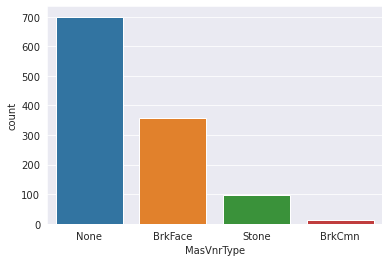

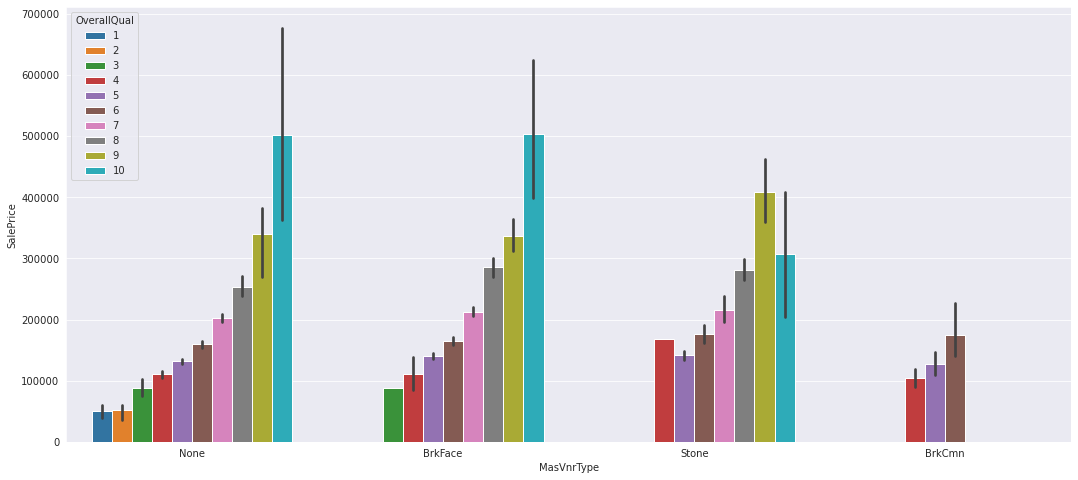

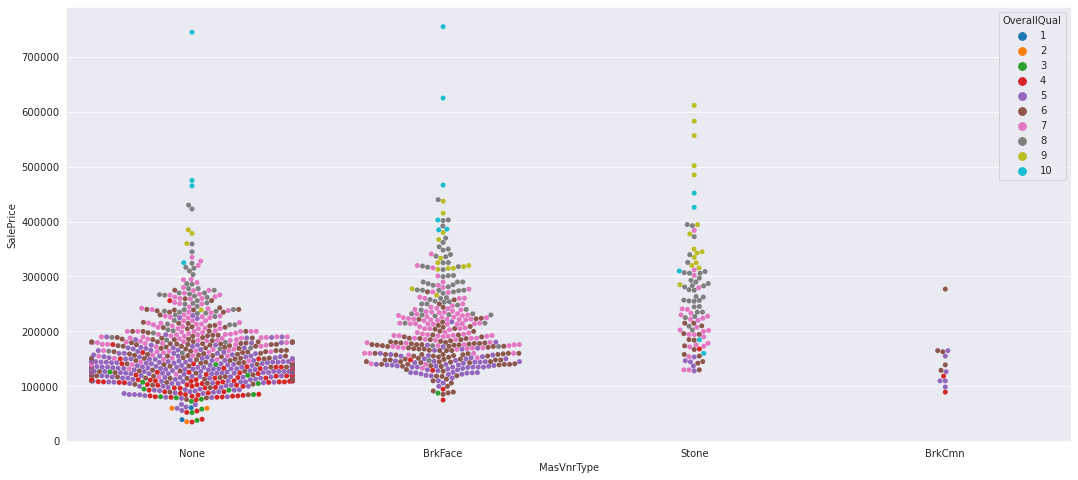

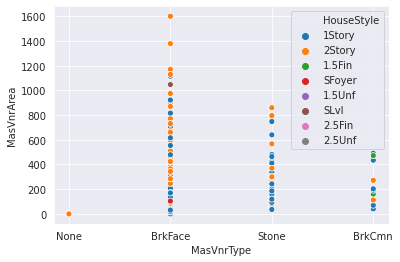

In [63]:
sns.countplot(df['MasVnrType'])
plt.show()

plt.figure(figsize=(18,8))
sns.barplot(x='MasVnrType',y='SalePrice',hue=df['OverallQual'],data=df)
plt.show()

plt.figure(figsize=(18,8))
sns.swarmplot(x='MasVnrType',y='SalePrice',hue=df['OverallQual'],data=df)
plt.show()

sns.scatterplot(df['MasVnrType'],df['MasVnrArea'],hue=df['HouseStyle'])
plt.xlabel("MasVnrType")
plt.ylabel("MasVnrArea")
plt.show()

### MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
### MasVnrArea: Masonry veneer area in square feet


#### Observation : 
    From above plot we can see that MasVnrType None have more number then have BrkFace and Stone. And also we obseved that MasVnrArea is depeneded on MasVnrType. And also handle some unrelated data in both the columns.

    Average sale price is mostly similar None and BrkFace. BrkFace and Stone consumne more are and having high slae prie from others.

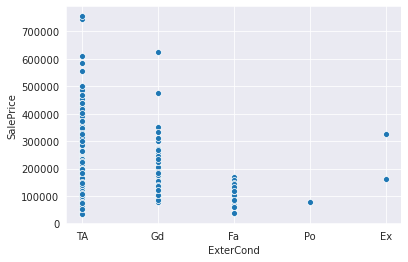

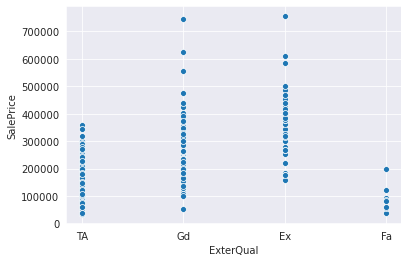

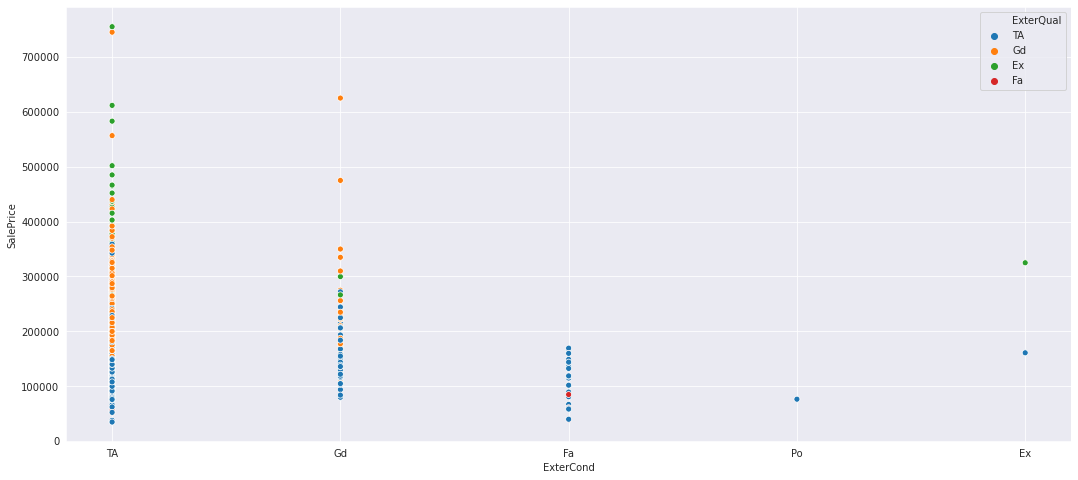

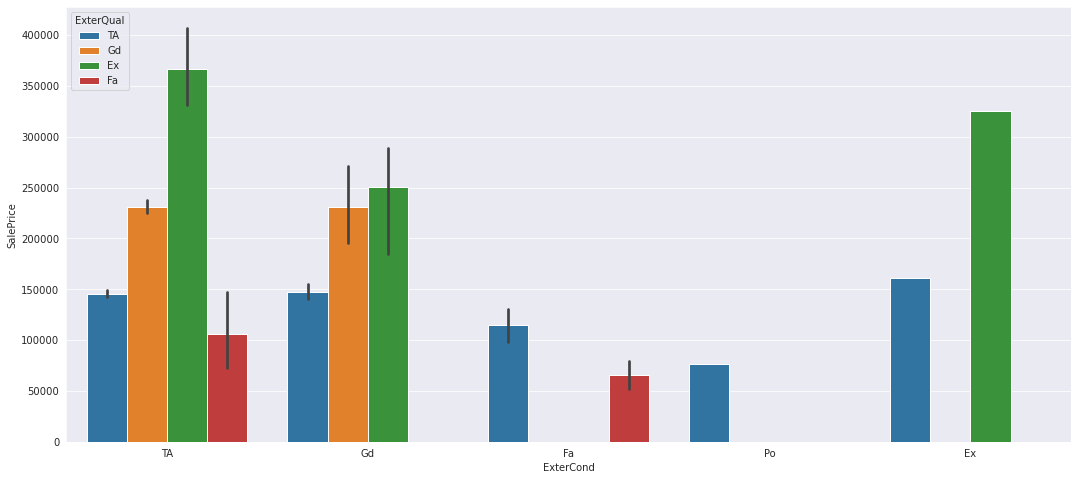

In [64]:
sns.scatterplot(df['ExterCond'],df['SalePrice'])
plt.show()

sns.scatterplot(df['ExterQual'],df['SalePrice'])
plt.show()

plt.figure(figsize=(18,8))
sns.scatterplot(x='ExterCond',y='SalePrice',hue=df['ExterQual'],data=df)
plt.show()

plt.figure(figsize=(18,8))
sns.barplot('ExterCond',y='SalePrice',hue=df['ExterQual'],data=df)
plt.show()


### ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
### ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
       
       
#### Observation : 

    Present condition of exterior having high number and the prices are based on the quality of the material on the exteior.

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

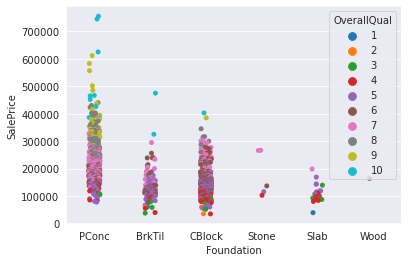

In [65]:
sns.stripplot('Foundation','SalePrice',hue='OverallQual',data=df.sort_values('SalePrice',ascending=False))

### Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
#### Observation : 
    Depends on type of foundation used sale price are also increasing.

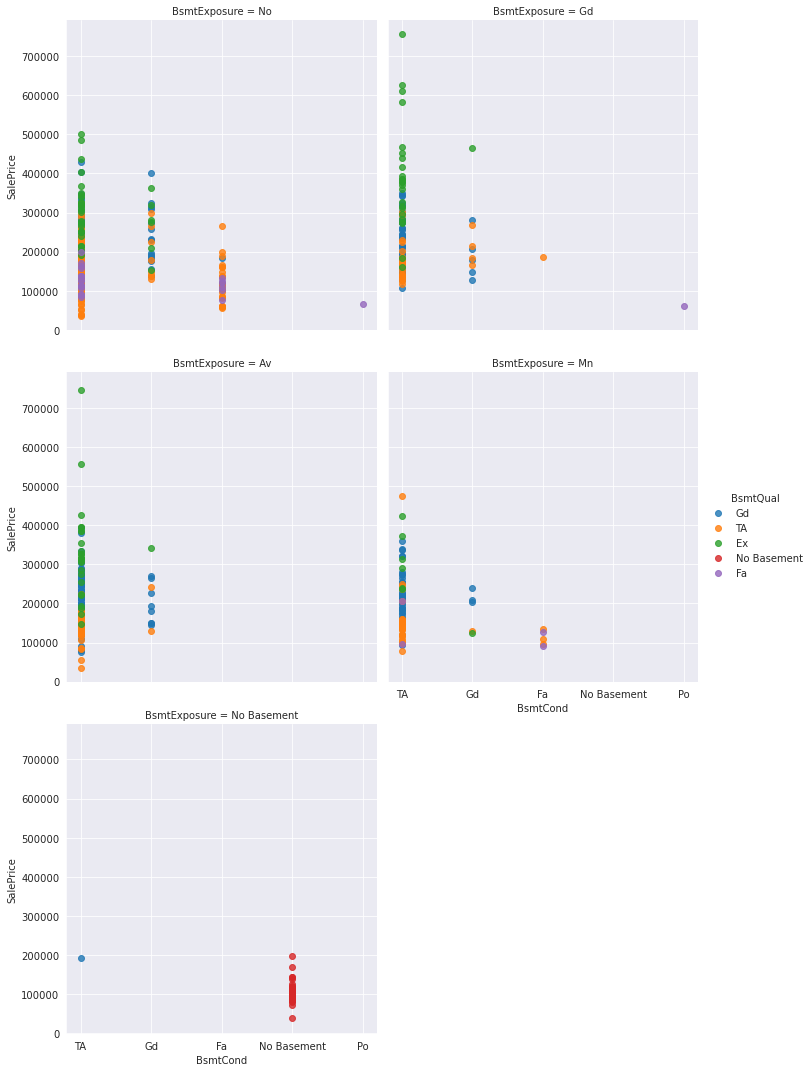

In [66]:
sns.lmplot("BsmtCond", "SalePrice", data=df, hue='BsmtQual', fit_reg=False, col='BsmtExposure', col_wrap=2)

### BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

### BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
### BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
       
#### Observation : 
    From above observation we can see that those have the  type Ex, Gd, Av,and Mn having sale price Heigh.

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

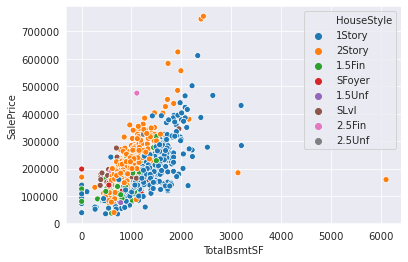

In [67]:
sns.scatterplot(df['TotalBsmtSF'],df['SalePrice'],hue=df['HouseStyle'])

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

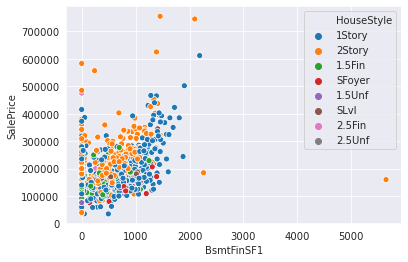

In [68]:
sns.scatterplot(df['BsmtFinSF1'],df['SalePrice'],hue=df['HouseStyle'])

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

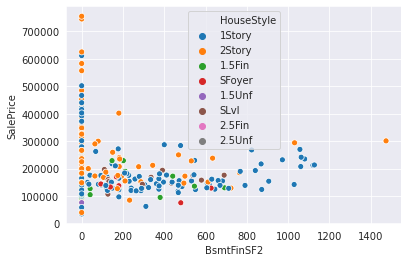

In [69]:
sns.scatterplot(df['BsmtFinSF2'],df['SalePrice'],hue=df['HouseStyle'])

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

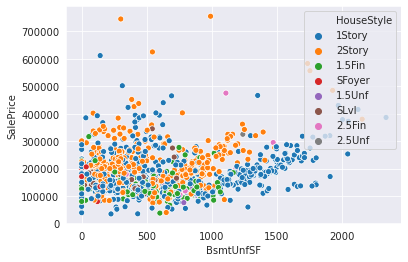

In [70]:
sns.scatterplot(df['BsmtUnfSF'],df['SalePrice'],hue=df['HouseStyle'])

### BsmtFinSF1: Type 1 finished square feet

### BsmtFinSF2: Type 2 finished square feet

### BsmtUnfSF: Unfinished square feet of basement area

### TotalBsmtSF: Total square feet of basement area

#### Observation : 

    BsmtFinSF1 and  TotalBsmtSF are heighly correalting with sale price and also BsmtUnfSF correalating with 
    sale price.
    
    If Total square feet of basement area is increasing simultaniously sale price are also increasing.

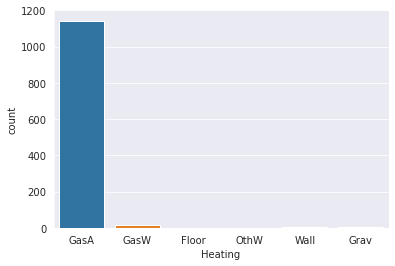

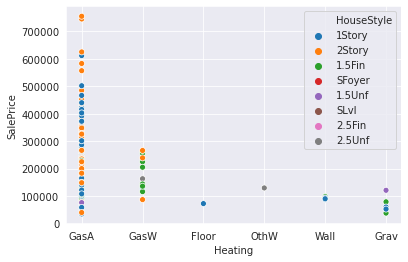

In [71]:
sns.countplot(df['Heating'])
plt.show()
sns.scatterplot(df['Heating'],df['SalePrice'],hue=df['HouseStyle'])
plt.show()

### Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
       
#### Observation : 
    If we look into the dataset "Heating" column having heighly inbalaced data. From this we can see that GasA having almost all data points. This column is not that much giving information to correalate to Sale price.

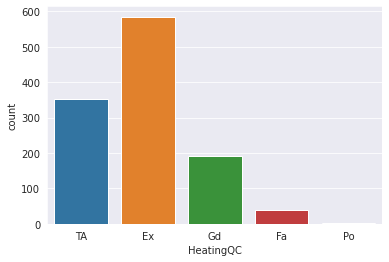

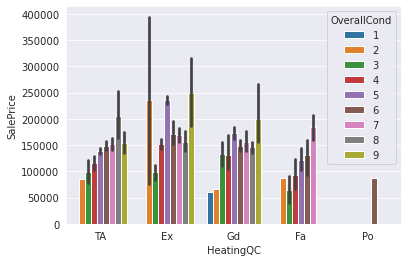

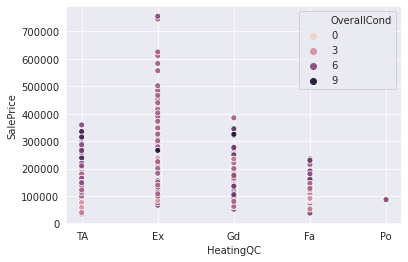

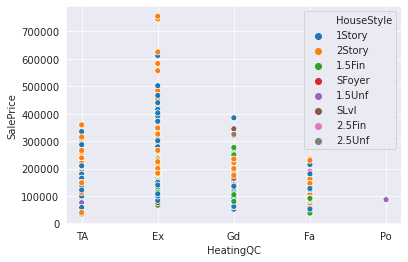

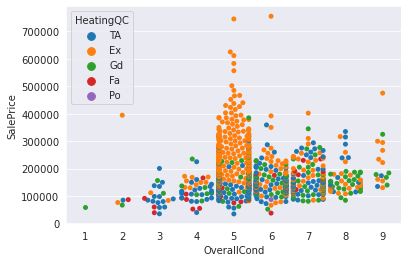

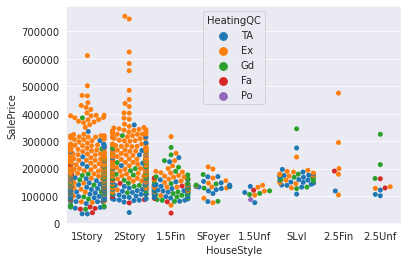

In [72]:
sns.countplot(df['HeatingQC'])
plt.show()

sns.barplot(df['HeatingQC'],df['SalePrice'],hue=df['OverallCond'])
plt.show()

sns.scatterplot(df['HeatingQC'],df['SalePrice'],hue=df['OverallCond'])
plt.show()

sns.scatterplot(df['HeatingQC'],df['SalePrice'],hue=df['HouseStyle'])
plt.show()


sns.swarmplot(df['OverallCond'],df['SalePrice'],hue=df['HeatingQC'])
plt.show()


sns.swarmplot(df['HouseStyle'],df['SalePrice'],hue=df['HeatingQC'])
plt.show()

### HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
       
#### Observation : 
    
    Sale price is not that afecting on the HeatingQC. If we see the plot having means of the sale price are 
    almost similar to others types.
    Based on the type of house and OveralQual sale price in increasing.

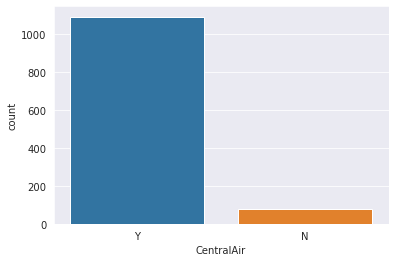

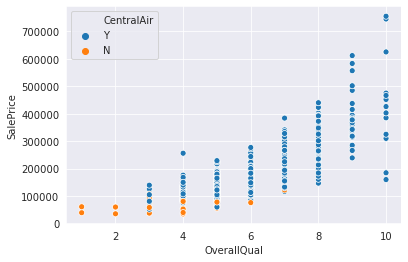

In [73]:
sns.countplot(df['CentralAir'])
plt.show()
sns.scatterplot(df['OverallQual'],df['SalePrice'],hue=df['CentralAir'])
plt.show()


### CentralAir: Central air conditioning

       N	No
       Y	Yes
       
#### Observation : 
    Those having air conditioning having sale price is heigh.
    Giving some information on sale price.

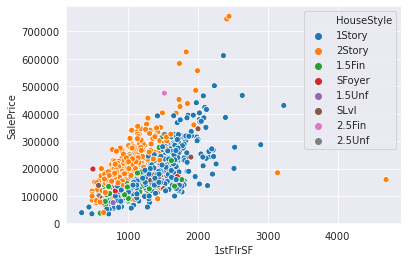

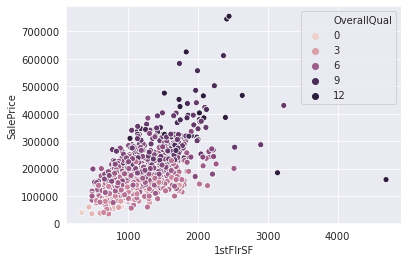

In [74]:
sns.scatterplot(df['1stFlrSF'],df['SalePrice'],hue=df['HouseStyle'])
plt.show()
sns.scatterplot(df['1stFlrSF'],df['SalePrice'],hue=df['OverallQual'])
plt.show()

### 1stFlrSF: First Floor square feet

#### Observation : 
    We can see that Sale price is heighly depending on the First Floor square feet.
    And also we can see that those houses have 2 story having good OveralQual.

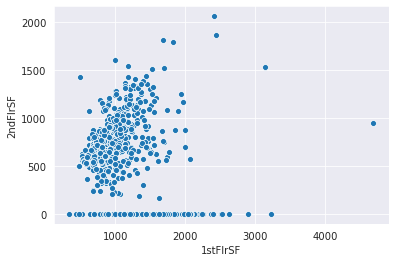

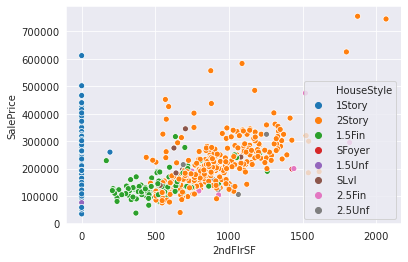

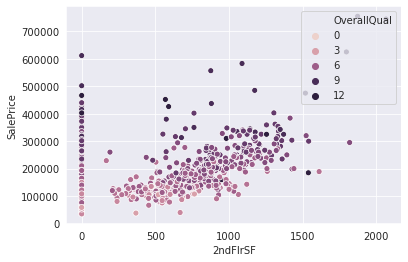

In [75]:
sns.scatterplot(df['1stFlrSF'],df['2ndFlrSF'])
plt.show()
sns.scatterplot(df['2ndFlrSF'],df['SalePrice'],hue=df['HouseStyle'])
plt.show()
sns.scatterplot(df['2ndFlrSF'],df['SalePrice'],hue=df['OverallQual'])
plt.show()

### 2ndFlrSF: Second floor square feet

#### Observation : 
    Those house's don't have 2nd floor having heigh square feet area range compared to nd floor.
    It is also height correalting with the sale price.
    

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

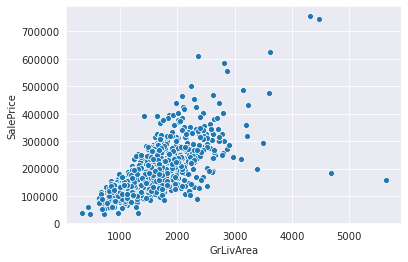

In [76]:
sns.scatterplot(df['GrLivArea'],df['SalePrice'])

### GrLivArea: Above grade (ground) living area square feet

#### Observation : 
    This column is also heighly correlating with the  sale price.

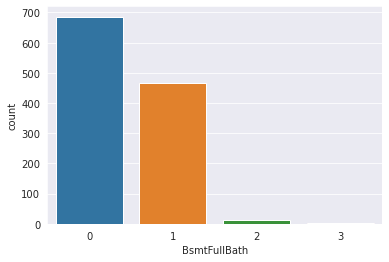

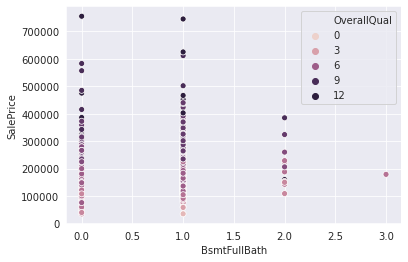

In [77]:
sns.countplot(df['BsmtFullBath'])
plt.show()
sns.scatterplot(df['BsmtFullBath'],df['SalePrice'],hue=df['OverallQual'])
plt.show()


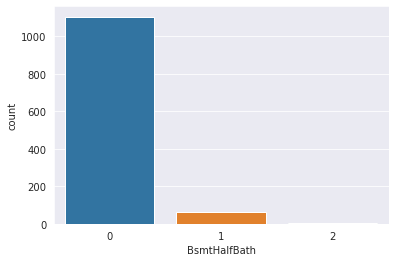

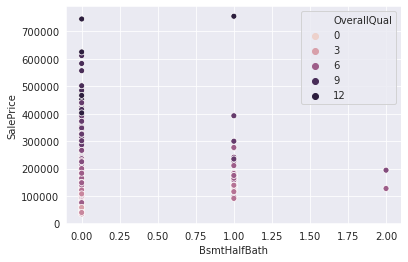

In [78]:
sns.countplot(df['BsmtHalfBath'])
plt.show()
sns.scatterplot(df['BsmtHalfBath'],df['SalePrice'],hue=df['OverallQual'])
plt.show()


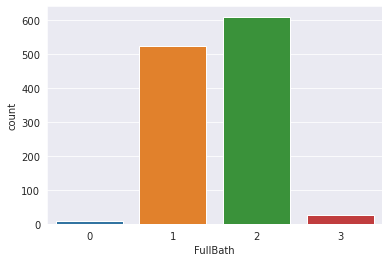

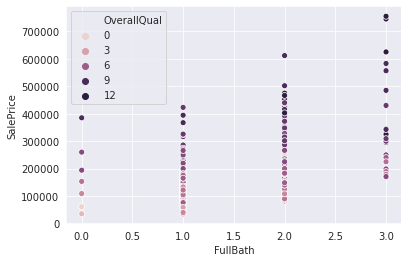

In [79]:
sns.countplot(df['FullBath'])
plt.show()
sns.scatterplot(df['FullBath'],df['SalePrice'],hue=df['OverallQual'])
plt.show()

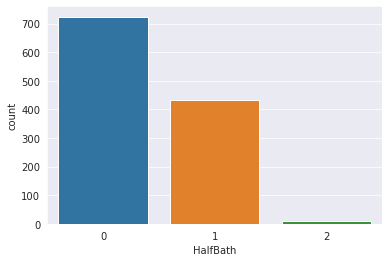

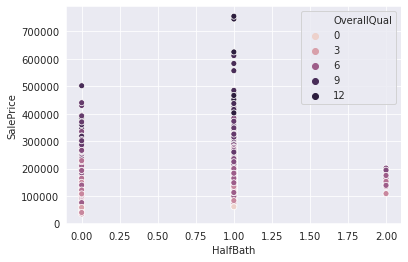

In [80]:
sns.countplot(df['HalfBath'])
plt.show()
sns.scatterplot(df['HalfBath'],df['SalePrice'],hue=df['OverallQual'])
plt.show()

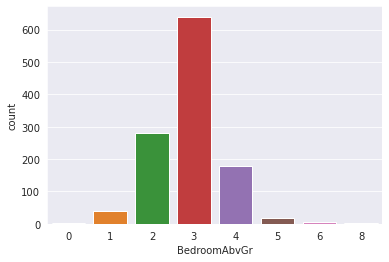

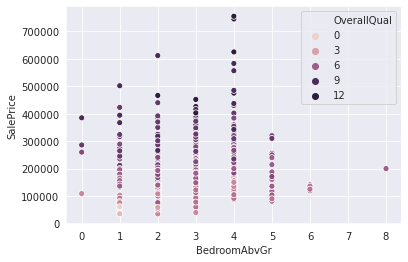

In [81]:
sns.countplot(df['BedroomAbvGr'])
plt.show()
sns.scatterplot('BedroomAbvGr','SalePrice',hue='OverallQual',data=df)
plt.show()

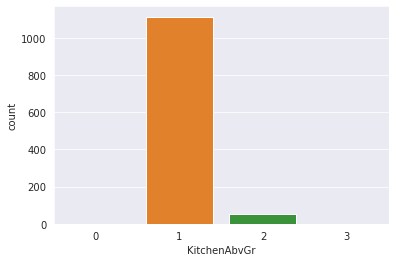

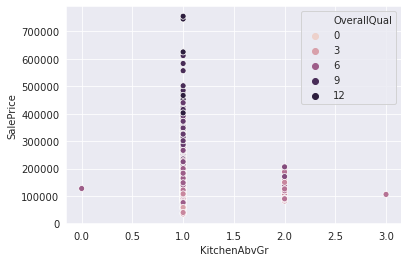

In [82]:
sns.countplot(df['KitchenAbvGr'])
plt.show()
sns.scatterplot('KitchenAbvGr','SalePrice',hue='OverallQual',data=df)
plt.show()

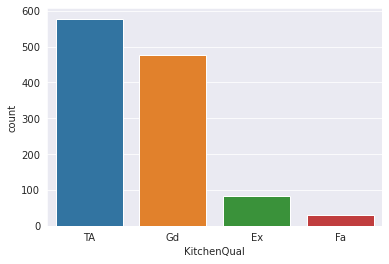

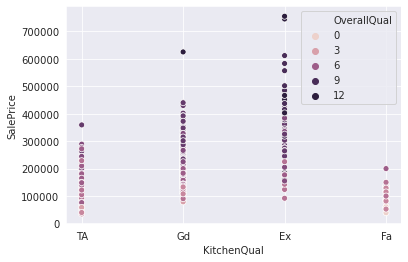

In [83]:
sns.countplot(df['KitchenQual'])
plt.show()
sns.scatterplot('KitchenQual','SalePrice',hue='OverallQual',data=df)
plt.show()

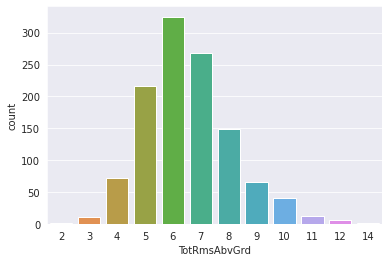

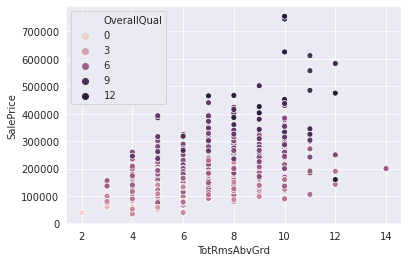

In [84]:
sns.countplot(df['TotRmsAbvGrd'])
plt.show()
sns.scatterplot('TotRmsAbvGrd','SalePrice',hue='OverallQual',data=df)
plt.show()

### Observation :
     All the columns is representing the grades. Form all above plots observation's those grades having high
     those grades having sale price heigh.

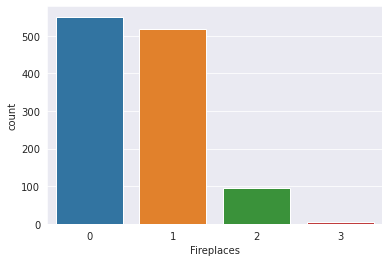

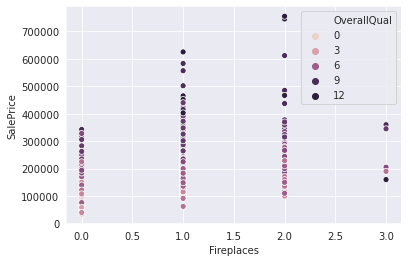

In [85]:
sns.countplot(df['Fireplaces'])
plt.show()
sns.scatterplot('Fireplaces','SalePrice',hue='OverallQual',data=df)
plt.show()

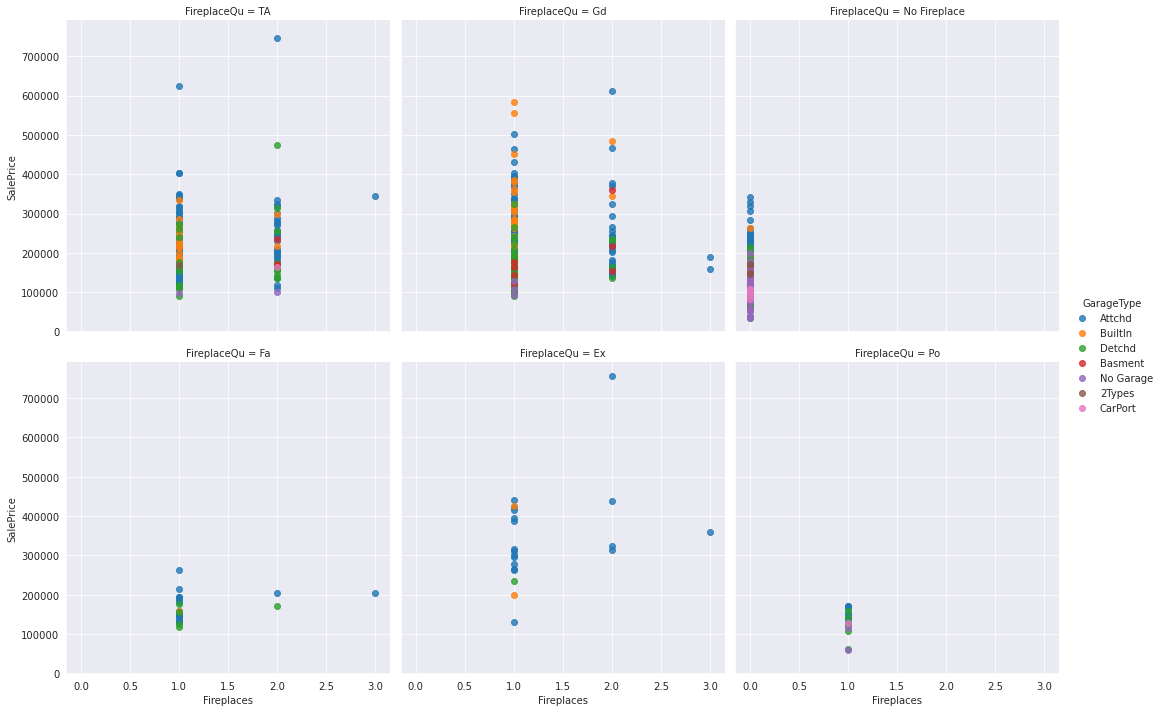

In [86]:
sns.lmplot("Fireplaces", "SalePrice", data=df, fit_reg=False, hue='GarageType',col='FireplaceQu', col_wrap=3)

### Fireplaces: Number of fireplaces

### FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
       
#### GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage       
#### Observation  :
    High number of Fireplaces sale price is also heig and also the  sale price is depending on the quality of
    FirePlace.
    
    Those data points have extream heigh sale prices they have FirePlace with good quality. And also  having
    these data points Garages with an attached.

### GarageCars: Size of garage in car capacity

### GarageArea: Size of garage in square feet


<AxesSubplot:xlabel='GarageCars', ylabel='GarageArea'>

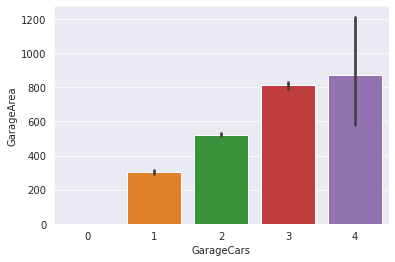

In [87]:
sns.barplot(df['GarageCars'],df['GarageArea'])

### Observation : 
    These columns are independent to eacch other. Number of GarageCars increase area are inreasing.

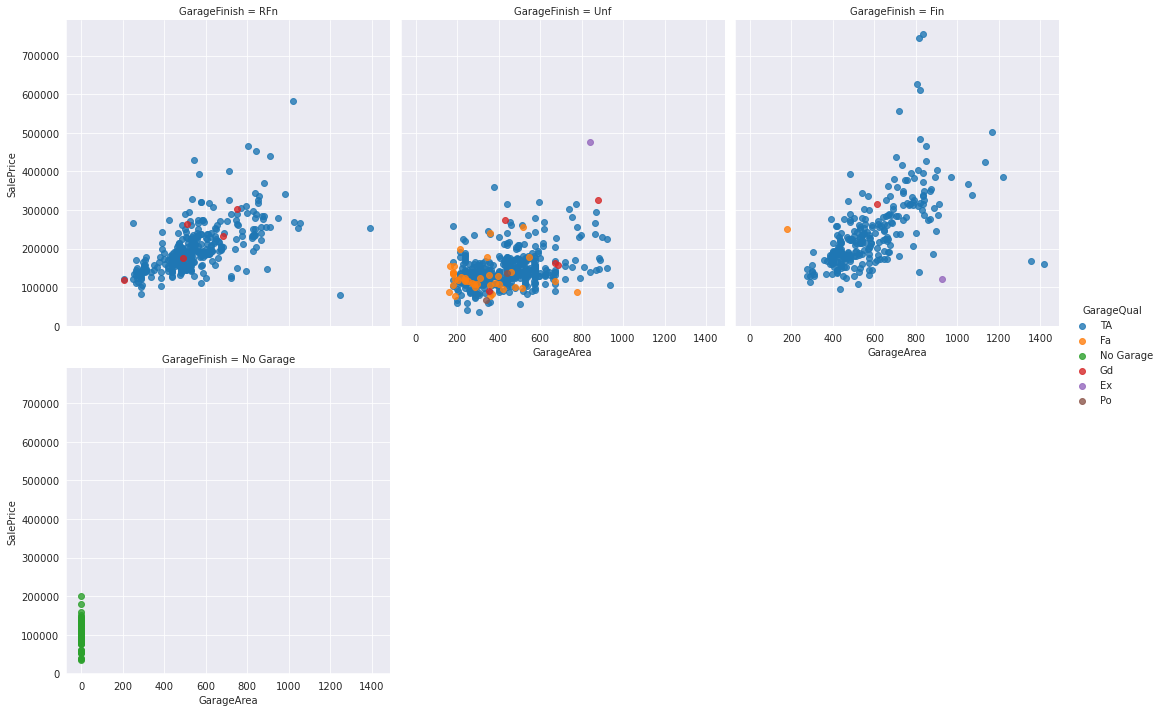

In [88]:
sns.lmplot("GarageArea", "SalePrice", data=df, fit_reg=False, hue='GarageQual',col='GarageFinish', col_wrap=3)

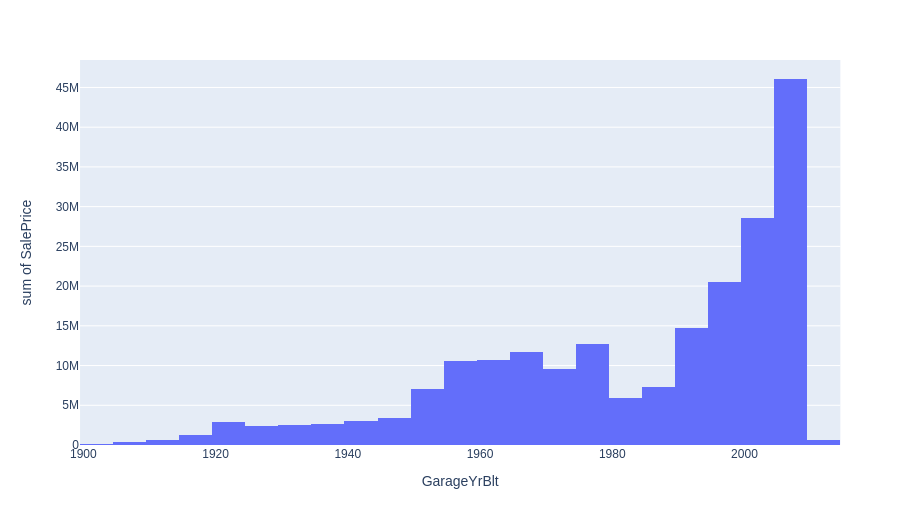

In [89]:
Image("/home/pavankumar/Downloads/newplot (25).png")

### GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
### GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

#### Observation : 
    
    Those garages are ginished and rough finish there pricese are high and with a quality Typically fair.
    those have unfinish garages sale price's are low compared to finish garage's.

### GarageYrBlt: Year garage was built

#### Observation : 
    As year increasing sale price are also increaing. Mean's recent build garages have more  demand and heigh 
    sale price.

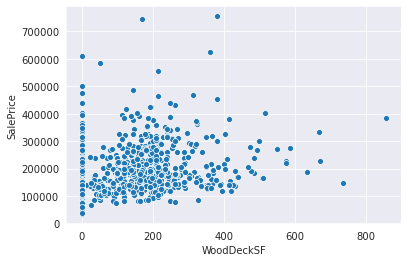

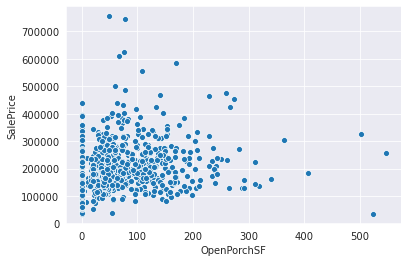

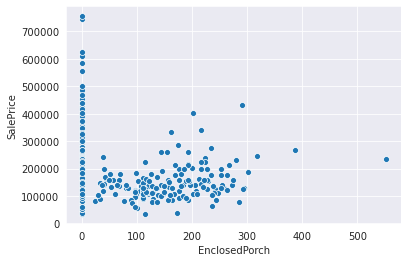

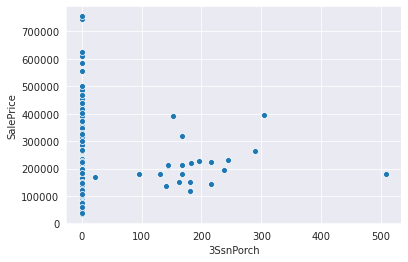

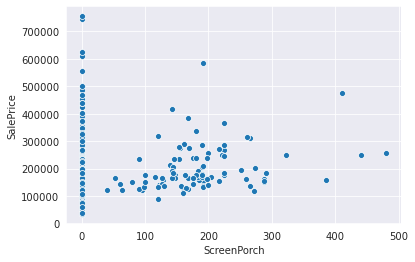

In [90]:
for name in ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']:
    sns.scatterplot(df[name],df['SalePrice'])
    plt.show()

### WoodDeckSF: Wood deck area in square feet

### OpenPorchSF: Open porch area in square feet

### EnclosedPorch: Enclosed porch area in square feet

### 3SsnPorch: Three season porch area in square feet

### ScreenPorch: Screen porch area in square feet : 


#### Observation :
     From above all the columns not that much  correlating with the sale price.
    

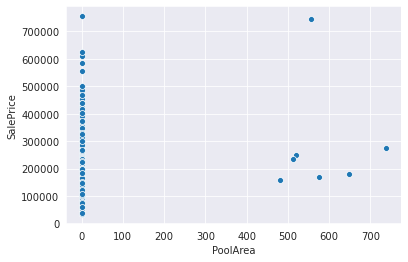

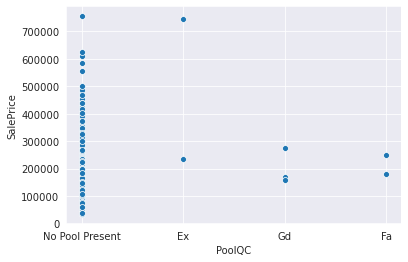

In [91]:
sns.scatterplot(df['PoolArea'],df['SalePrice'])
plt.show()
sns.scatterplot(df['PoolQC'],df['SalePrice'])
plt.show()

### PoolArea: Pool area in square feet

### PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
#### Observation : 
    Mostly houses dont have a Pool. This columna are not that much affective to sale price beacuse of less data
    or imabalace column.

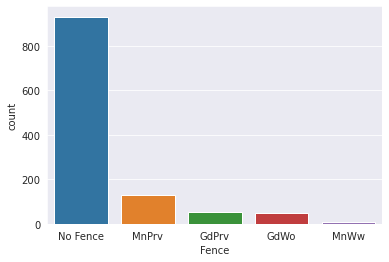

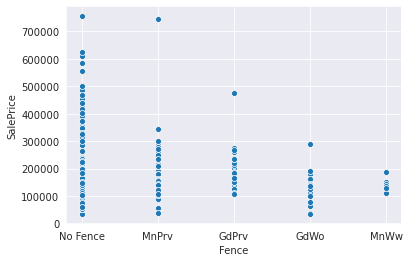

In [92]:
sns.countplot(df['Fence'])
plt.show()
sns.scatterplot(df['Fence'],df['SalePrice'])
plt.show()

### Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence 

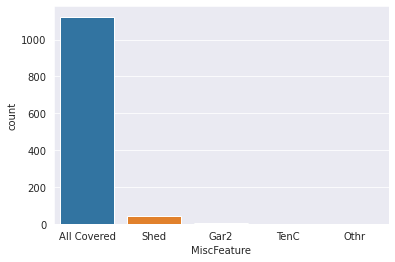

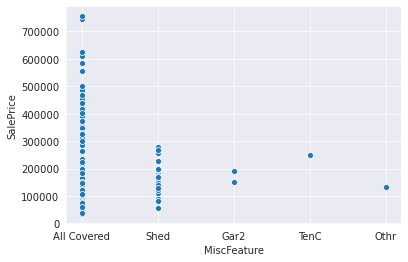

In [93]:
sns.countplot(df['MiscFeature'])
plt.show()
sns.scatterplot(df['MiscFeature'],df['SalePrice'])
plt.show()

### MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
#### Observation : 
    Most of the houses are All covered.

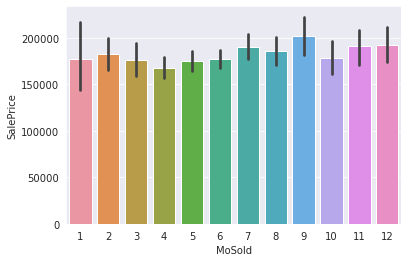

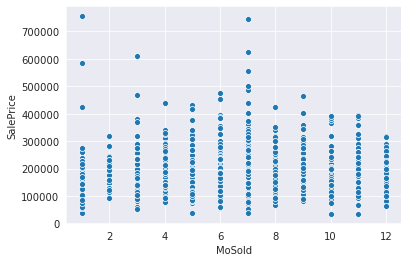

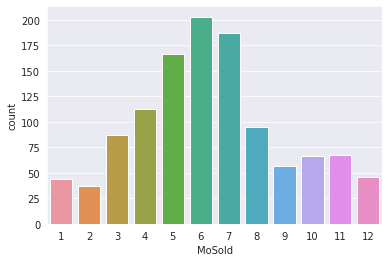

In [94]:
sns.barplot(df['MoSold'],df['SalePrice'])
plt.show()
sns.scatterplot(df['MoSold'],df['SalePrice'])
plt.show()
sns.countplot(df['MoSold'])
plt.show()

### MoSold: Month Sold (MM)
#### Observation : 
    Average sale pric of each month is constant. In midle of the year soo many houses are sold.

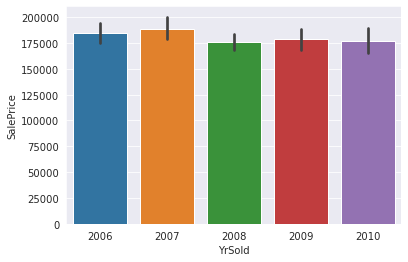

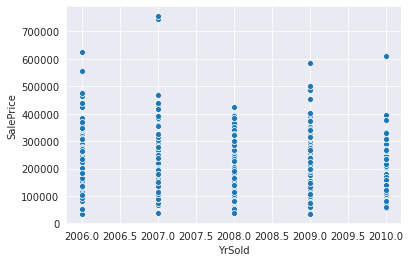

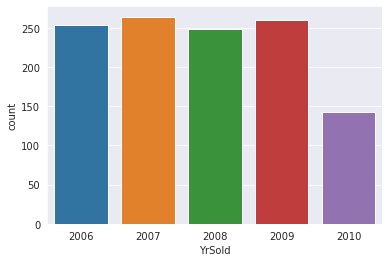

In [95]:
sns.barplot(df['YrSold'],df['SalePrice'])
plt.show()
sns.scatterplot(df['YrSold'],df['SalePrice'])
plt.show()
sns.countplot(df['YrSold'])
plt.show()

### YrSold: Year Sold (YYYY)
#### Observation : 
    Average sale pric of each year is constant. In 2010 less number of houses are sold.

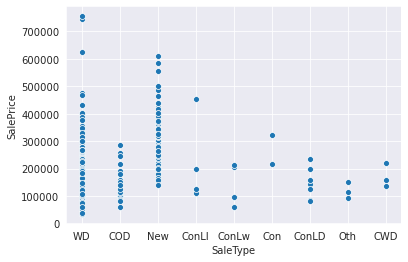

<AxesSubplot:xlabel='SaleType', ylabel='count'>

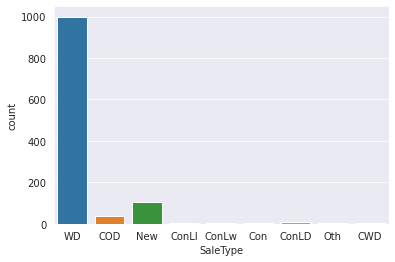

In [96]:
sns.scatterplot(df['SaleType'],df['SalePrice'])
plt.show()
sns.countplot(df['SaleType'])

### SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
#### Observation : 
    WD 	Warranty Deed - Conventional are having heigh number of times.

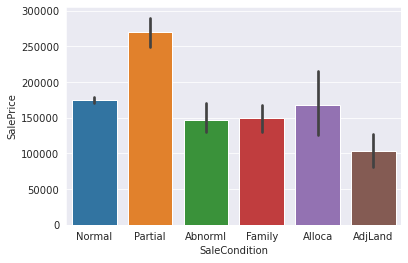

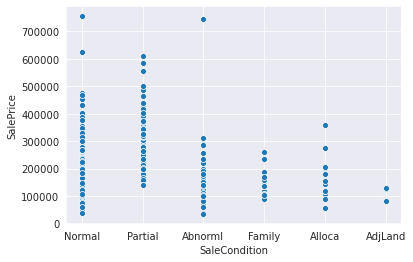

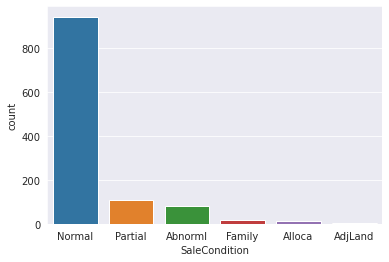

In [97]:
sns.barplot(df['SaleCondition'],df['SalePrice'])
plt.show()
sns.scatterplot(df['SaleCondition'],df['SalePrice'])
plt.show()
sns.countplot(df['SaleCondition'])
plt.show()

### SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
#### Observation : 
    Most of the sale's done normally.

# Dropping duplicated rows if there :

In [98]:
df.duplicated().sum()

0

#### Data set don't have duplicated rows.

# Lable Encoding

### Listing down Ordinary columns and Nominal Data columns.

In [99]:
Ordinary_col=["ExterQual","ExterCond","BsmtQual","BsmtCond","LandSlope","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC",
"KitchenQual","FireplaceQu","GarageFinish","GarageQual","GarageCond","PoolQC"]

In [100]:
nominal=[]
for i in df.select_dtypes('O').columns:
    if i not in Ordinary_col:
        nominal.append(i)

In [101]:
nominal

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

#### Lable encoding on Ordinal Data

In [102]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [103]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [104]:
for col in Ordinary_col:
    df[col]=oe.fit_transform(pd.DataFrame(df[col]))

In [105]:
len(df['MSZoning'].unique())

5

In [106]:
cardinality_col=[]
lis=[]
for col in nominal:
    if len(df['MSZoning'].unique())>6:
        cardinality_col.append(col)
    else:
        lis.append(col)
print(cardinality_col)
print("****")
print(lis)

[]
****
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [107]:
import category_encoders as ce

In [108]:
#Create target encoding object
encoder=ce.TargetEncoder(cols=nominal) 

#Fit and Transform Train Data
dt=encoder.fit_transform(df[nominal],df['SalePrice'])
dt

MSZoning         Street          Alley       LotShape  \
0     191004.181034  181684.450172  184016.191567  206038.464103   
1     191004.181034  181684.450172  184016.191567  206038.464103   
2     191004.181034  181684.450172  184016.191567  206038.464103   
3     191004.181034  181684.450172  184016.191567  206038.464103   
4     191004.181034  181684.450172  184016.191567  206038.464103   
...             ...            ...            ...            ...   
1163  191004.181034  181684.450172  184016.191567  206038.464103   
1164  191004.181034  181684.450172  184016.191567  165906.660811   
1165  191004.181034  181684.450172  184016.191567  165906.660811   
1166   75244.525916  181684.450172  168264.555556  165906.660811   
1167  191004.181034  181684.450172  184016.191567  206038.464103   

        LandContour      Utilities      LotConfig   Neighborhood  \
0     181476.572658  181477.005993  178003.105701  142004.744044   
1     181476.572658  181477.005993  178003.105701  146511.225275   
2     181476.572658  181477.005993  224594.463768  341260.228571   
3     181476.572658  181477.005993  178003.105701  191643.305085   
4     181476.572658  181477.005993  171138.636364  191643.305085   
...             ...            ...            ...            ...   
1163  181476.572658  181477.005993  178003.105701  135029.866667   
1164  181476.572658  181477.005993  178003.105701  128544.216867   
1165  181476.572658  181477.005993  171138.636364  142004.744044   
1166  181476.572658  181477.005993  178003.105701  101322.666667   
1167  181476.572658  181477.005993  178003.105701  194790.093750   

         Condition1     Condition2  ...        Heating     CentralAir  \
0     184692.003980  181697.129983  ...  182591.394576  186696.381651   
1     184692.003980  181697.129983  ...  182591.394576  186696.381651   
2     184692.003980  181697.129983  ...  182591.394576  186696.381651   
3     184692.003980  181697.129983  ...  182591.394576  186696.381651   
4     184692.003980  181697.129983  ...  182591.394576  186696.381651   
...             ...            ...  ...            ...            ...   
1163  184692.003980  181697.129983  ...  182591.394576  186696.381651   
1164  142799.731343  181697.129983  ...  182591.394576  186696.381651   
1165  184692.003980  181697.129983  ...  182591.394576  186696.381651   
1166  142799.731343  181697.129983  ...  182591.394576  108539.576923   
1167  184692.003980  181697.129983  ...  182591.394576  186696.381651   

         Electrical     Functional     GarageType     PavedDrive  \
0     187253.339252  184204.948387  203675.839363  187006.026144   
1     187253.339252  184204.948387  203675.839363  187006.026144   
2     187253.339252  184204.948387  203675.839363  187006.026144   
3     187253.339252  184204.948387  203675.839363  187006.026144   
4     187253.339252  184204.948387  203675.839363  187006.026144   
...             ...            ...            ...            ...   
1163  187253.339252  184204.948387  135873.799363  187006.026144   
1164  187253.339252  184204.948387  135873.799363  116421.472973   
1165  187253.339252  184204.948387  203675.839363  187006.026144   
1166  187253.339252  184204.948387  135873.799363  116421.472973   
1167  187253.339252  184204.948387  203675.839363  187006.026144   

             Fence    MiscFeature       SaleType  SaleCondition  
0     188489.27927  182541.548043  173668.456456  175436.408466  
1     188489.27927  182541.548043  173668.456456  175436.408466  
2     188489.27927  182541.548043  173668.456456  175436.408466  
3     151392.79845  182541.548043  146722.368421  175436.408466  
4     188489.27927  182541.548043  173668.456456  175436.408466  
...            ...            ...            ...            ...  
1163  151392.79845  182541.548043  173668.456456  175436.408466  
1164  151392.79845  182541.548043  173668.456456  175436.408466  
1165  188489.27927  182541.548043  173668.456456  175436.408466  
1166  151392.79845  182

In [109]:
# dummies=pd.get_dummies(df[nominal],drop_first=True)

In [110]:
# dummies.shape

In [111]:
# df.drop(nominal,axis=1,inplace=True)

In [112]:
df1=pd.concat([df.drop(nominal,axis=1),dt],axis=1)

In [113]:
df1.shape

(1168, 82)

In [114]:
from sklearn.impute import KNNImputer
knnim=KNNImputer(n_neighbors=9)

In [115]:
df1['LotFrontage']=knnim.fit_transform(pd.DataFrame(df1['LotFrontage']))
df1['LotFrontage']=df1['LotFrontage'].astype('int')

In [116]:
from sklearn.feature_selection import VarianceThreshold

vt=VarianceThreshold(threshold=0)
vt.fit_transform(df1)
df1.columns[vt.get_support()]

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'remod_afr_yrbuilt', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 

In [117]:
[i for i in df1.columns if i not in df1.columns[vt.get_support()]]

['Utilities']

In [118]:
df1.drop([i for i in df1.columns if i not in df1.columns[vt.get_support()]],axis=1,inplace=True)

### Dropped constant colums 

In [119]:
df1.drop('Id',axis=1,inplace=True)

#### Id column have discreate values. No uniqueness is present that is why dropped this column. 

## Feature Selection

In [120]:
target=df1['SalePrice']

In [121]:
df1.drop('SalePrice',axis=1,inplace=True)

<AxesSubplot:>

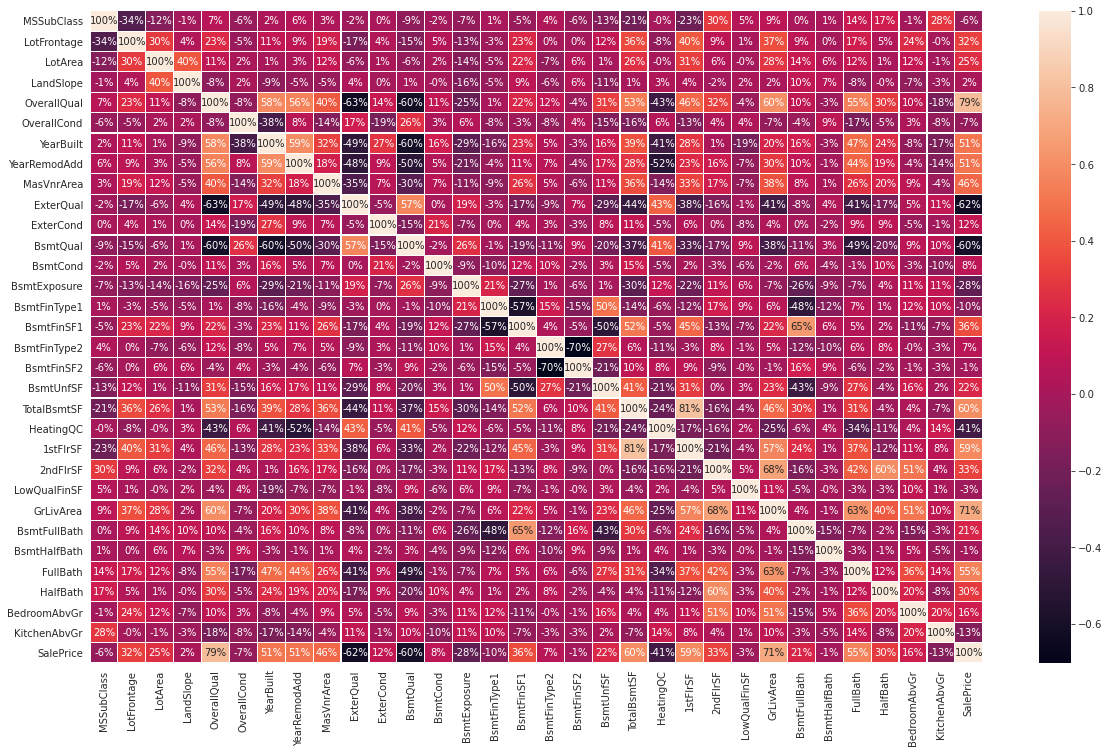

In [122]:
tst=df1.iloc[:,:31]
tst['SalePrice']=target
plt.figure(figsize=(20,12))
sns.heatmap(tst.corr(),annot=True,linewidths=0.2,fmt='0.0%')

<AxesSubplot:>

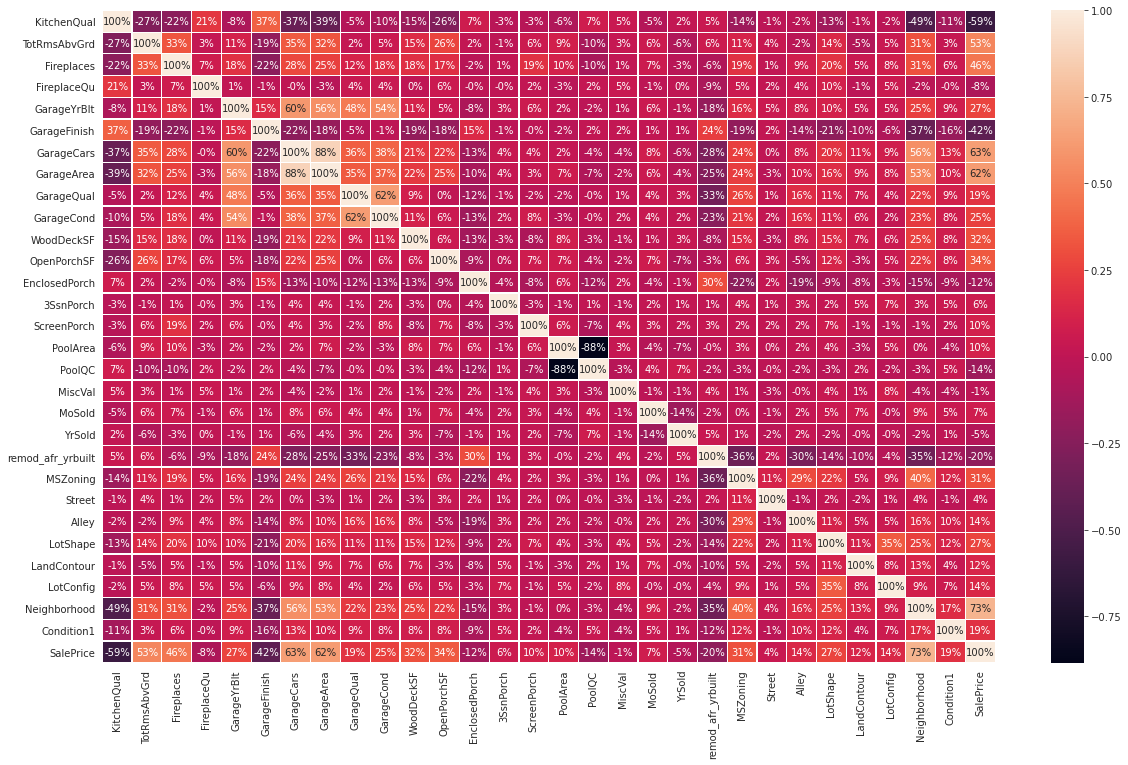

In [123]:
tst1=df1.iloc[:,31:60]
tst1['SalePrice']=target
plt.figure(figsize=(20,12))
sns.heatmap(tst1.corr(),annot=True,linewidths=0.2,fmt='0.0%')

<AxesSubplot:>

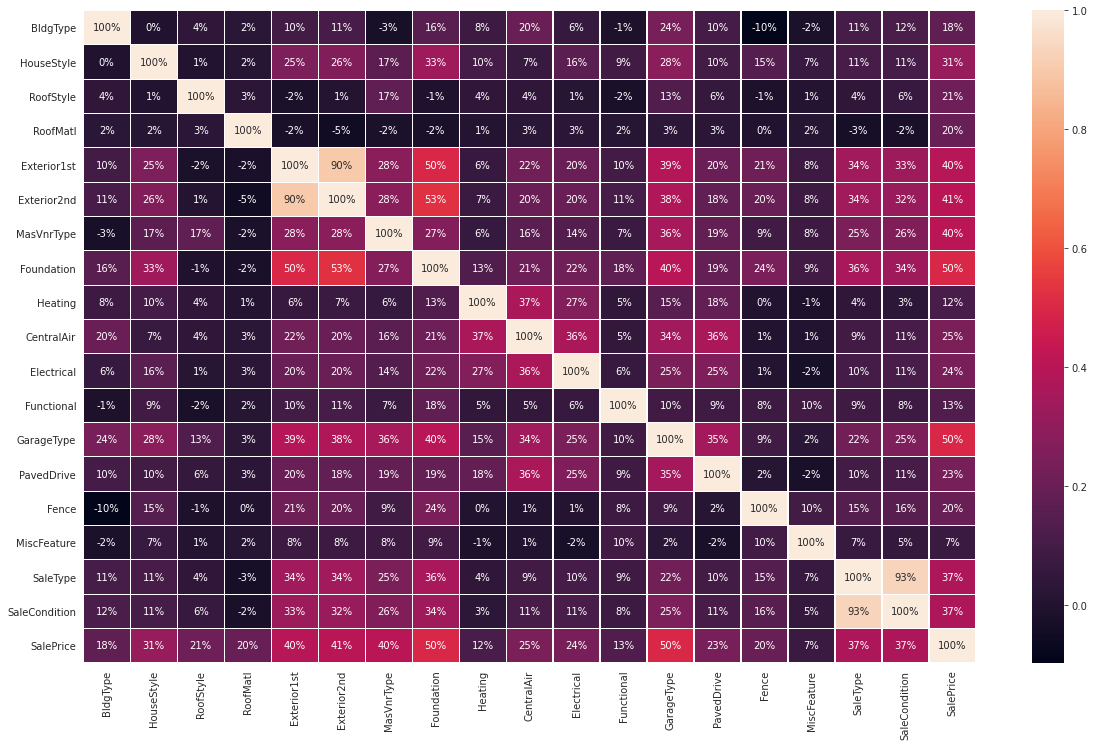

In [124]:
tst3=df1.iloc[:,61:]
tst3['SalePrice']=target
plt.figure(figsize=(20,12))
sns.heatmap(tst3.corr(),annot=True,linewidths=0.2,fmt='0.0%')

In [125]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [126]:
# ! pip install category_encoders

In [127]:
X_train, X_test, y_train, y_test = train_test_split(df1,target, test_size=0.30, 
                                                    random_state=30)

Feature 0: 4.417456
Feature 1: 79.138673
Feature 2: 103.362284
Feature 3: 0.316957
Feature 4: 1455.728025
Feature 5: 7.628153
Feature 6: 322.504213
Feature 7: 309.044348
Feature 8: 204.142031
Feature 9: 655.290670
Feature 10: 9.502574
Feature 11: 501.756481
Feature 12: 7.867150
Feature 13: 81.549764
Feature 14: 8.037415
Feature 15: 114.462953
Feature 16: 3.504844
Feature 17: 0.008361
Feature 18: 53.860188
Feature 19: 540.993836
Feature 20: 152.354497
Feature 21: 458.621379
Feature 22: 57.640783
Feature 23: 3.943160
Feature 24: 688.843718
Feature 25: 39.324617
Feature 26: 0.479601
Feature 27: 317.910142
Feature 28: 71.589616
Feature 29: 9.660109
Feature 30: 13.960292
Feature 31: 443.842432
Feature 32: 280.844885
Feature 33: 220.849808
Feature 34: 10.485769
Feature 35: 55.656060
Feature 36: 220.926336
Feature 37: 515.593111
Feature 38: 489.304962
Feature 39: 35.673369
Feature 40: 56.898716
Feature 41: 77.612627
Feature 42: 116.372570
Feature 43: 11.148675
Feature 44: 3.677864
Feature 45:

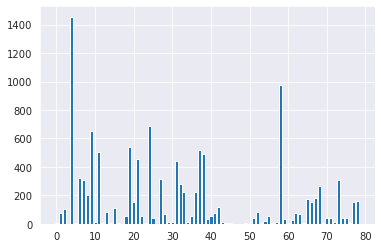

In [128]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
    
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


X_train, X_test, y_train, y_test = train_test_split(df1, target, test_size=0.33, random_state=30)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [129]:
fvls=pd.Series(fs.scores_)

In [130]:
fvls.index=df1.columns

In [131]:
features_fval=pd.DataFrame(fvls.sort_values(ascending=False))

In [132]:
features_fval.shape

(79, 1)

In [133]:
features_fval.head(60)
features_fval.head(30)

0
OverallQual    1455.728025
Neighborhood    977.970858
GrLivArea       688.843718
ExterQual       655.290670
TotalBsmtSF     540.993836
GarageCars      515.593111
BsmtQual        501.756481
GarageArea      489.304962
1stFlrSF        458.621379
KitchenQual     443.842432
YearBuilt       322.504213
FullBath        317.910142
GarageType      309.673233
YearRemodAdd    309.044348
TotRmsAbvGrd    280.844885
Foundation      264.629184
GarageFinish    220.926336
Fireplaces      220.849808
MasVnrArea      204.142031
MasVnrType      181.824796
Exterior1st     175.364320
SaleCondition   158.064763
SaleType        155.572374
Exterior2nd     153.933914
HeatingQC       152.354497
OpenPorchSF     116.372570
BsmtFinSF1      114.462953
LotArea         103.362284
BsmtExposure     81.549764
MSZoning         79.474793

In [134]:
features_fval.tail(20)

0
BsmtFinType1  8.037415
BsmtCond      7.867150
LandContour   7.726289
OverallCond   7.628153
RoofMatl      7.317784
MiscFeature   5.054803
MSSubClass    4.417456
MoSold        4.127915
LowQualFinSF  3.943160
3SsnPorch     3.677864
BsmtFinType2  3.504844
Condition2    2.884443
Street        2.312812
YrSold        0.984091
BsmtHalfBath  0.479601
MiscVal       0.359940
LandSlope     0.316957
PoolQC        0.249236
PoolArea      0.063289
BsmtFinSF2    0.008361

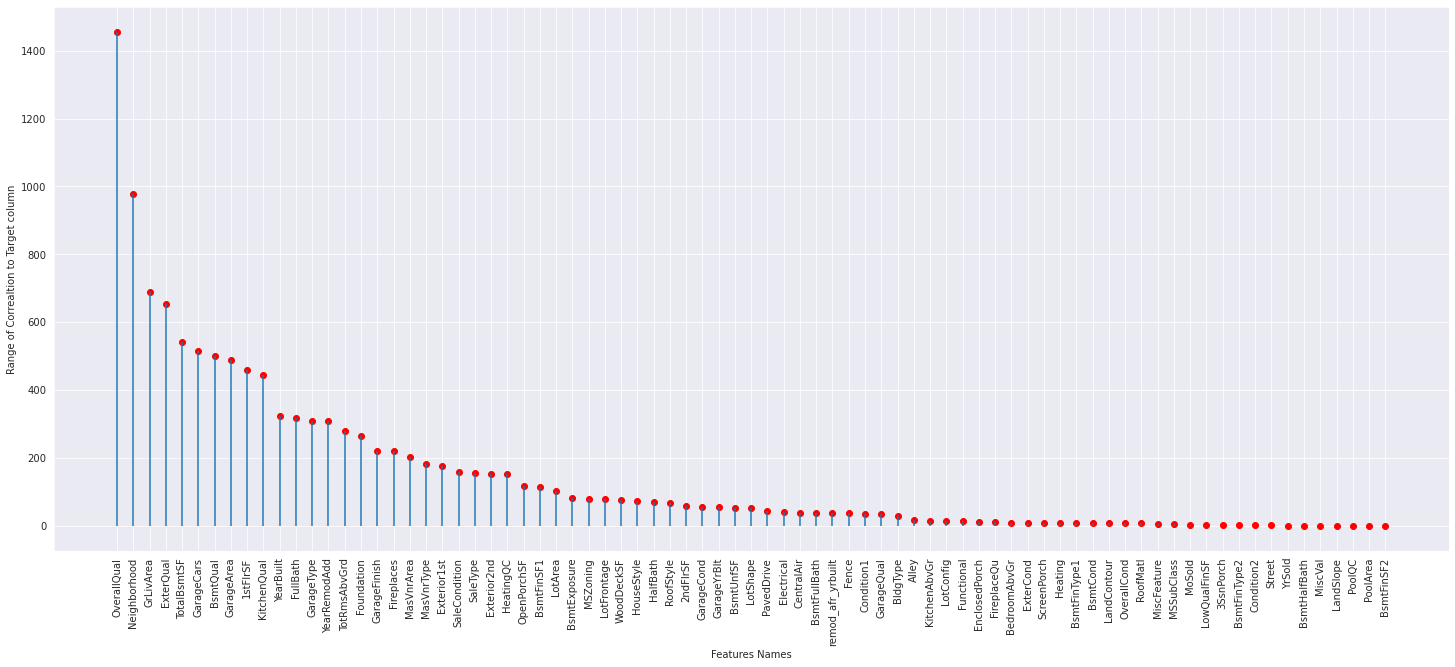

In [135]:
plt.figure(figsize=(25,10))
plt.xlabel("Features Names")
plt.ylabel("Range of Correaltion to Target column")

plt.xticks(rotation=90)
ax=plt.scatter(features_fval.index,features_fval[0],color='r')
for i,j in zip(ax.axes.get_xticks(),features_fval[0]):
    plt.vlines(i,0,j)
plt.show()

# Model Building

### Before Feature Selection

In [136]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [137]:
parameters_sgd={
 'penalty': ['l1','l2','elasticnet'],
 'alpha': [0.0001,0.001,0.01,0.1,1],
    'max_iter':[1000,2000],
#     'random_state': list(np.arange(30,250)),
}
parameters_rndf={
 'criterion': ['mse','mae'],
 'max_features': ['auto','sqrt'],
 'n_estimators': list(np.arange(100,150)),
#  'random_state': list(np.arange(30,250)),
    'max_depth':[5],
}
parameters_deci_tree={
 'criterion': ['mse','mae'],
#  'splitter':['best','random'],
 'max_features': ['auto','sqrt'],
 'max_depth':list(np.arange(5,30)),
#  'random_state': list(np.arange(30,250)),
}

parameters_knn_reg={
    'n_neighbors': list(np.arange(5,10)),
    'weights':['uniform','distance'],
    
}
parameters_svr_reg={
    'kernel': ['linear','poly','rbf'],
    'gamma':['auto','scale'],
    'max_iter':[500,700],
    
}
parameters_linear_reg = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [138]:
def best_rn_state(model,X,target):
    # for best random state
    best_state=0
    accu=0
    for i in range(30,250):
        X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.25,random_state=i)
        md = model
        md.fit(X_train,y_train)
        pred = md.predict(X_test)
        rscrore=r2_score(y_test,pred)
        if rscrore>accu:
            accu=rscrore
            best_state=i
    return best_state


In [139]:
def best_cv(model,X_train,y_train):
    best_state=0
    accu=0
    for i in range(5,15):
        md = model
        md.fit(X_train,y_train)
        crv=cross_val_score(md,X_train,y_train,cv=i).mean()
        if crv>accu:
            accu=crv
            best_state=i
    if best_state==0:
        return 5
    return best_state

In [140]:
def pipeline_models(X,target):
    parameter_lis=[parameters_linear_reg,parameters_knn_reg,parameters_svr_reg,parameters_deci_tree,parameters_sgd]
    models=[LinearRegression(),KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),SGDRegressor()]
    best_score=0
    best_model_name=''
    for model,parameter in zip(models,parameter_lis):
        rnd_state=best_rn_state(model,X,target)
        print("Best Random State : ",rnd_state)
        X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.25,random_state=rnd_state)
        bst_cv=best_cv(model,X_train,y_train)
        print("Best CV is :", bst_cv)
        gsv=GridSearchCV(estimator=model,param_grid=parameter,cv=bst_cv,scoring='r2')
        
        gsv.fit(X_train,y_train)
        print("Traning Score : ",gsv.score(X_train,y_train),"\n\n")
        pred=gsv.best_estimator_.predict(X_test)
        r2score=r2_score(y_test,pred)
        crv=cross_val_score(model,X_train,y_train,cv=bst_cv).mean()
        print(f"Cross Validate score is {(crv*100)}\n\nFinal accuracy is {r2score*100} \n\n{gsv.best_estimator_}\n\n{gsv.best_params_}\n\n=====================================================")
        if r2score>best_score and crv>0:
            best_score=r2score
            best_model_name=[]
            best_model_name.append(model)

    return f"Best model name is :  {best_model_name[0]}"

In [141]:
X=df1
target=df['SalePrice']
pipeline_models(X,target)

Best Random State :  88
Best CV is : 9
Traning Score :  0.8504222137890989 


Cross Validate score is 72.67409308922167

Final accuracy is 88.6535756197947 

LinearRegression(normalize=True)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

Best Random State :  184
Best CV is : 13
Traning Score :  0.9999999999996753 


Cross Validate score is 55.509153104772544

Final accuracy is 74.13482023990574 

KNeighborsRegressor(n_neighbors=9, weights='distance')

{'n_neighbors': 9, 'weights': 'distance'}

Best Random State :  0
Best CV is : 5
Traning Score :  -0.14024191841615696 


Cross Validate score is -5.528010438354061

Final accuracy is -11.781906061356429 

SVR(kernel='poly', max_iter=500)

{'gamma': 'scale', 'kernel': 'poly', 'max_iter': 500}

Best Random State :  151
Best CV is : 12
Traning Score :  0.927295019944126 


Cross Validate score is 67.80779656706166

Final accuracy is 82.0027084848208 

DecisionTreeRegressor(max_depth=6, max_features='auto')

{'criterion': 'mse'

'Best model name is :  LinearRegression()'

In [142]:
# rf=RandomForestRegressor(criterion="mae",n_estimators=900)
# rf.fit(X_train,y_train)
# pred=rf.predict(X_test)
# r2score=r2_score(y_test,pred)
# print("Accuracy : ",r2score)
# # crv=cross_val_score(rf,X_train,y_train,cv=11).mean()
# # print("Cross Validation Score : ",crv)

In [143]:
# rnd_state=best_rn_state(RandomForestRegressor())
# print("Best Random State : ",rnd_state)

# X_train, X_test, y_train, y_test = train_test_split(df1,target, test_size=0.25,random_state=rnd_state)
# bst_cv=best_cv(RandomForestRegressor(),X_train,y_train)
# print("Best CV is :", bst_cv)

# gsv=GridSearchCV(estimator=RandomForestRegressor(),param_grid=parameters_rndf,cv=bst_cv,scoring='r2')

# gsv=gsv.fit(X_train,y_train)
# print("Traning Score : ",gsv.score(X_train,y_train),"/n/n")

# pred=gsv.best_estimator_.predict(X_test)
# r2score=r2_score(y_test,pred)
# crv=cross_val_score(model,X_train,y_train,cv=bst_cv).mean()
# print(f"Cross Validate score is {(crv*100)}\n\nFinal accuracy is {r2score*100} \n\n{gsv.best_estimator_}\n\n{gsv[0].best_params_}\n\n=====================================================")
    

###  After feature Selection

In [144]:
X=df1.drop(list(features_fval.loc['remod_afr_yrbuilt':].index),axis=1)
target=df['SalePrice']
pipeline_models(X,target)

Best Random State :  88
Best CV is : 9
Traning Score :  0.8110290334796052 


Cross Validate score is 73.96179609397292

Final accuracy is 88.62035176740173 

LinearRegression(normalize=True)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

Best Random State :  219
Best CV is : 5
Traning Score :  0.9999999999987296 


Cross Validate score is 55.34773846518212

Final accuracy is 71.91548607178805 

KNeighborsRegressor(n_neighbors=8, weights='distance')

{'n_neighbors': 8, 'weights': 'distance'}

Best Random State :  0
Best CV is : 5
Traning Score :  -0.1514656417724607 


Cross Validate score is -5.513429655155915

Final accuracy is -12.78635653108362 

SVR(kernel='poly', max_iter=500)

{'gamma': 'scale', 'kernel': 'poly', 'max_iter': 500}

Best Random State :  182
Best CV is : 13
Traning Score :  0.9057051663309714 


Cross Validate score is 66.35582002928793

Final accuracy is 65.08124830295748 

DecisionTreeRegressor(criterion='mae', max_depth=6, max_features='auto')

{'c

'Best model name is :  LinearRegression()'

In [145]:
# rf=RandomForestRegressor(n_estimators=600,criterion='mae')
# X_train, X_test, y_train, y_test = train_test_split(df1,target, test_size=0.25,random_state=205)
# rf.fit(X_train,y_train)
# rf.predict(X_test)
# r2score=r2_score(y_test,pred)
# print("Accuracy : ",r2score)
# crv=cross_val_score(rf,X_train,y_train,cv=11).mean()
# print("Cross Validation Score : ",crv)

### After Some more feature selection

In [146]:
X=df1.drop(list(features_fval.loc['BsmtExposure':].index),axis=1)
target=df['SalePrice']
pipeline_models(X,target)

Best Random State :  88
Best CV is : 9
Traning Score :  0.8010148744006712 


Cross Validate score is 74.5318427137589

Final accuracy is 88.28730473202424 

LinearRegression(fit_intercept=False, normalize=True)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

Best Random State :  121
Best CV is : 13
Traning Score :  0.9999999968833827 


Cross Validate score is 59.29039409915303

Final accuracy is 69.86643847001328 

KNeighborsRegressor(n_neighbors=9, weights='distance')

{'n_neighbors': 9, 'weights': 'distance'}

Best Random State :  0
Best CV is : 5
Traning Score :  -0.1392513579086303 


Cross Validate score is -5.4952523337841885

Final accuracy is -11.714830673754628 

SVR(kernel='poly', max_iter=500)

{'gamma': 'scale', 'kernel': 'poly', 'max_iter': 500}

Best Random State :  245
Best CV is : 5
Traning Score :  0.8571065508510944 


Cross Validate score is 69.07526239498607

Final accuracy is 74.20584595492102 

DecisionTreeRegressor(criterion='mae', max_depth=5, ma

'Best model name is :  LinearRegression()'

In [147]:
# rf=RandomForestRegressor(criterion="mae",n_estimators=900)
# rf.fit(X_train,y_train)
# rf.predict(X_test)
# r2score=r2_score(y_test,pred)
# print("Accuracy : ",r2score)
# # crv=cross_val_score(rf,X_train,y_train,cv=11).mean()
# # print("Cross Validation Score : ",crv)

### Scaling and Handeling Outliers

In [148]:
continues_col=["MasVnrArea","BsmtFinSF1","BsmtUnfSF","TotalBsmtSF","1stFlrSF","1stFlrSF","GrLivArea","GarageArea",
"WoodDeckSF","OpenPorchSF"]

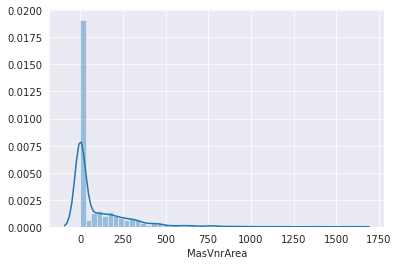

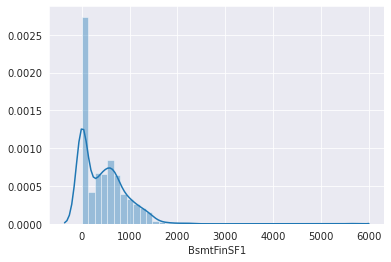

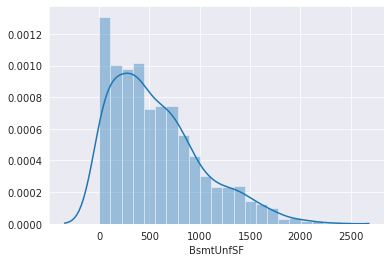

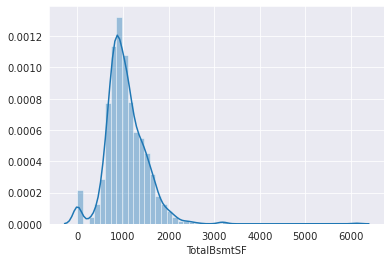

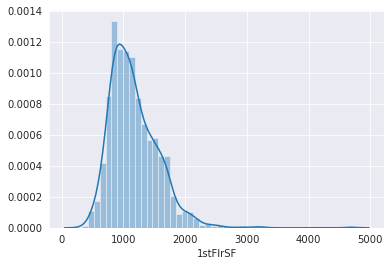

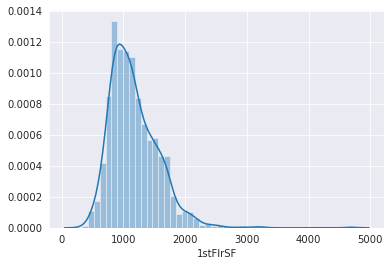

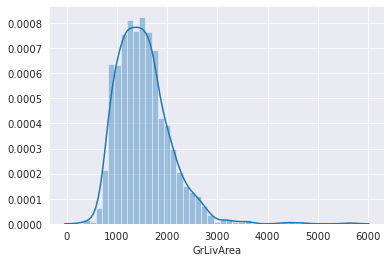

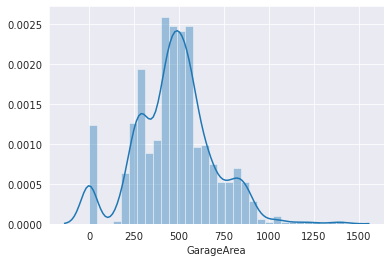

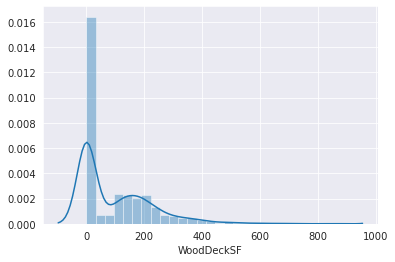

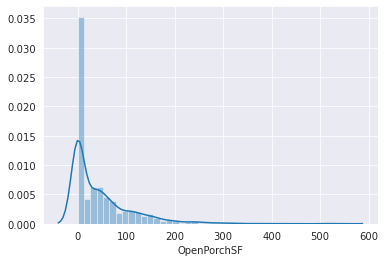

In [149]:
for i in continues_col:
    sns.distplot(df1[i])
    plt.show()

In [150]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [151]:
for i in continues_col:
    df[i]=pt.fit_transform(pd.DataFrame(df[i]))

In [152]:
df2=df1.copy()

In [153]:
df2[continues_col].skew()

MasVnrArea     2.835693
BsmtFinSF1     1.871606
BsmtUnfSF      0.909057
TotalBsmtSF    1.744591
1stFlrSF       1.513707
1stFlrSF       1.513707
GrLivArea      1.449952
GarageArea     0.189665
WoodDeckSF     1.504929
OpenPorchSF    2.410840
dtype: float64

In [154]:
for i in continues_col:
    df2[i]=pt.fit_transform(pd.DataFrame(df2[i]))

In [155]:
df2[continues_col].skew()

MasVnrArea     0.440350
BsmtFinSF1    -0.404528
BsmtUnfSF     -0.284390
TotalBsmtSF    0.286779
1stFlrSF      -0.013862
1stFlrSF      -0.013862
GrLivArea     -0.000054
GarageArea    -0.320370
WoodDeckSF     0.113026
OpenPorchSF   -0.002749
dtype: float64

In [156]:
X=df2
target=df['SalePrice']
pipeline_models(X,target)

Best Random State :  88
Best CV is : 9
Traning Score :  0.8529169391509097 


Cross Validate score is 76.01636105619751

Final accuracy is 88.39820489788417 

LinearRegression(fit_intercept=False, normalize=True)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

Best Random State :  184
Best CV is : 13
Traning Score :  0.9999999999948908 


Cross Validate score is 55.507858540837454

Final accuracy is 73.95876956533283 

KNeighborsRegressor(n_neighbors=9, weights='distance')

{'n_neighbors': 9, 'weights': 'distance'}

Best Random State :  0
Best CV is : 5
Traning Score :  -0.1388020501842413 


Cross Validate score is -5.528034259509771

Final accuracy is -11.654162304514703 

SVR(kernel='poly', max_iter=500)

{'gamma': 'scale', 'kernel': 'poly', 'max_iter': 500}

Best Random State :  173
Best CV is : 11
Traning Score :  0.9944553324378543 


Cross Validate score is 72.01317494130053

Final accuracy is 82.89556026732961 

DecisionTreeRegressor(max_depth=11, max_features='au

'Best model name is :  LinearRegression()'

### After Scalling the data

In [157]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [158]:
ss_df=ss.fit_transform(df2[continues_col])

In [159]:
ss_df=pd.DataFrame(ss_df)

In [160]:
new_df2=pd.concat([df2.drop(continues_col,axis=1),ss_df],axis=1)

In [161]:
X=new_df2
target=df['SalePrice']
pipeline_models(X,target)

Best Random State :  88
Best CV is : 9
Traning Score :  0.8529169391509097 


Cross Validate score is 76.01636105617273

Final accuracy is 88.39820489789952 

LinearRegression(fit_intercept=False, normalize=True)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

Best Random State :  184
Best CV is : 13
Traning Score :  0.9999999999953147 


Cross Validate score is 55.507858540837454

Final accuracy is 73.95846309151722 

KNeighborsRegressor(n_neighbors=9, weights='distance')

{'n_neighbors': 9, 'weights': 'distance'}

Best Random State :  0
Best CV is : 5
Traning Score :  -0.14029622876200398 


Cross Validate score is -5.528162081787293

Final accuracy is -11.786604638349996 

SVR(kernel='poly', max_iter=500)

{'gamma': 'scale', 'kernel': 'poly', 'max_iter': 500}

Best Random State :  151
Best CV is : 6
Traning Score :  0.927295019944126 


Cross Validate score is 72.17127960284398

Final accuracy is 81.60421738389827 

DecisionTreeRegressor(max_depth=6, max_features='auto

'Best model name is :  LinearRegression()'

In [ ]:
# X=new_df2
# target=df['SalePrice']


In [188]:
# gsv=GridSearchCV(estimator=RandomForestRegressor(),param_grid=parameters_rndf,cv=32,scoring='r2')
# X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.25,random_state=151)       
# gsv.fit(X_train,y_train)
# print("Traning Score : ",gsv.score(X_train,y_train),"\n\n")
# pred=gsv.best_estimator_.predict(X_test)
# r2score=r2_score(y_test,pred)
# r2score

In [162]:
drop_lis=list(features_fval.loc['remod_afr_yrbuilt':].index)
drop_lis

['remod_afr_yrbuilt',
 'Fence',
 'Condition1',
 'GarageQual',
 'BldgType',
 'Alley',
 'KitchenAbvGr',
 'LotConfig',
 'Functional',
 'EnclosedPorch',
 'FireplaceQu',
 'BedroomAbvGr',
 'ExterCond',
 'ScreenPorch',
 'Heating',
 'BsmtFinType1',
 'BsmtCond',
 'LandContour',
 'OverallCond',
 'RoofMatl',
 'MiscFeature',
 'MSSubClass',
 'MoSold',
 'LowQualFinSF',
 '3SsnPorch',
 'BsmtFinType2',
 'Condition2',
 'Street',
 'YrSold',
 'BsmtHalfBath',
 'MiscVal',
 'LandSlope',
 'PoolQC',
 'PoolArea',
 'BsmtFinSF2']

In [163]:

X=new_df2.drop(drop_lis,axis=1)
target=df['SalePrice']
pipeline_models(X,target)

Best Random State :  88
Best CV is : 9
Traning Score :  0.8200398439182465 


Cross Validate score is 78.03829813705072

Final accuracy is 87.83669117411728 

LinearRegression()

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

Best Random State :  219
Best CV is : 12
Traning Score :  0.9999999997409389 


Cross Validate score is 55.270703631952244

Final accuracy is 71.59174322069954 

KNeighborsRegressor(n_neighbors=9, weights='distance')

{'n_neighbors': 9, 'weights': 'distance'}

Best Random State :  0
Best CV is : 5
Traning Score :  -0.15127053601964624 


Cross Validate score is -5.5138470832209086

Final accuracy is -12.768436118617599 

SVR(kernel='poly', max_iter=500)

{'gamma': 'scale', 'kernel': 'poly', 'max_iter': 500}

Best Random State :  121
Best CV is : 6
Traning Score :  0.8726289733976941 


Cross Validate score is 63.77476960509975

Final accuracy is 78.6733077951901 

DecisionTreeRegressor(max_depth=5, max_features='auto')

{'criterion': 'mse', 'max_dept

'Best model name is :  LinearRegression()'

In [164]:
features_fval.head(30)

0
OverallQual    1455.728025
Neighborhood    977.970858
GrLivArea       688.843718
ExterQual       655.290670
TotalBsmtSF     540.993836
GarageCars      515.593111
BsmtQual        501.756481
GarageArea      489.304962
1stFlrSF        458.621379
KitchenQual     443.842432
YearBuilt       322.504213
FullBath        317.910142
GarageType      309.673233
YearRemodAdd    309.044348
TotRmsAbvGrd    280.844885
Foundation      264.629184
GarageFinish    220.926336
Fireplaces      220.849808
MasVnrArea      204.142031
MasVnrType      181.824796
Exterior1st     175.364320
SaleCondition   158.064763
SaleType        155.572374
Exterior2nd     153.933914
HeatingQC       152.354497
OpenPorchSF     116.372570
BsmtFinSF1      114.462953
LotArea         103.362284
BsmtExposure     81.549764
MSZoning         79.474793

In [165]:
drop_lis=list(features_fval.loc['BsmtExposure':].index)
drop_lis

['BsmtExposure',
 'MSZoning',
 'LotFrontage',
 'WoodDeckSF',
 'HouseStyle',
 'HalfBath',
 'RoofStyle',
 '2ndFlrSF',
 'GarageCond',
 'GarageYrBlt',
 'BsmtUnfSF',
 'LotShape',
 'PavedDrive',
 'Electrical',
 'CentralAir',
 'BsmtFullBath',
 'remod_afr_yrbuilt',
 'Fence',
 'Condition1',
 'GarageQual',
 'BldgType',
 'Alley',
 'KitchenAbvGr',
 'LotConfig',
 'Functional',
 'EnclosedPorch',
 'FireplaceQu',
 'BedroomAbvGr',
 'ExterCond',
 'ScreenPorch',
 'Heating',
 'BsmtFinType1',
 'BsmtCond',
 'LandContour',
 'OverallCond',
 'RoofMatl',
 'MiscFeature',
 'MSSubClass',
 'MoSold',
 'LowQualFinSF',
 '3SsnPorch',
 'BsmtFinType2',
 'Condition2',
 'Street',
 'YrSold',
 'BsmtHalfBath',
 'MiscVal',
 'LandSlope',
 'PoolQC',
 'PoolArea',
 'BsmtFinSF2']

In [166]:
drop_lis.remove('WoodDeckSF')
drop_lis.remove('BsmtUnfSF')
X=new_df2.drop(drop_lis,axis=1)
target=df['SalePrice']
pipeline_models(X,target)

Best Random State :  88
Best CV is : 9
Traning Score :  0.8039107182237968 


Cross Validate score is 77.78994718189361

Final accuracy is 88.02807106563156 

LinearRegression()

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

Best Random State :  121
Best CV is : 13
Traning Score :  0.9999999457737162 


Cross Validate score is 58.92583909144435

Final accuracy is 68.312649744737 

KNeighborsRegressor(n_neighbors=9, weights='distance')

{'n_neighbors': 9, 'weights': 'distance'}

Best Random State :  0
Best CV is : 5
Traning Score :  -0.1398921613729831 


Cross Validate score is -5.497007501435123

Final accuracy is -11.768688601538656 

SVR(kernel='poly', max_iter=500)

{'gamma': 'scale', 'kernel': 'poly', 'max_iter': 500}

Best Random State :  220
Best CV is : 12
Traning Score :  0.8569816647836687 


Cross Validate score is 64.67935871997425

Final accuracy is 81.65223717298782 

DecisionTreeRegressor(criterion='mae', max_depth=5, max_features='auto')

{'criterion': 'm

'Best model name is :  LinearRegression()'

In [167]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif.sort_values("VIF", ascending=True))

In [168]:
X = new_df2
vif=calc_vif(X)
vif.head(4)

variables       VIF
35     3SsnPorch  1.072014
39       MiscVal  1.187194
36   ScreenPorch  1.252937
20  BsmtHalfBath  1.308315

<AxesSubplot:>

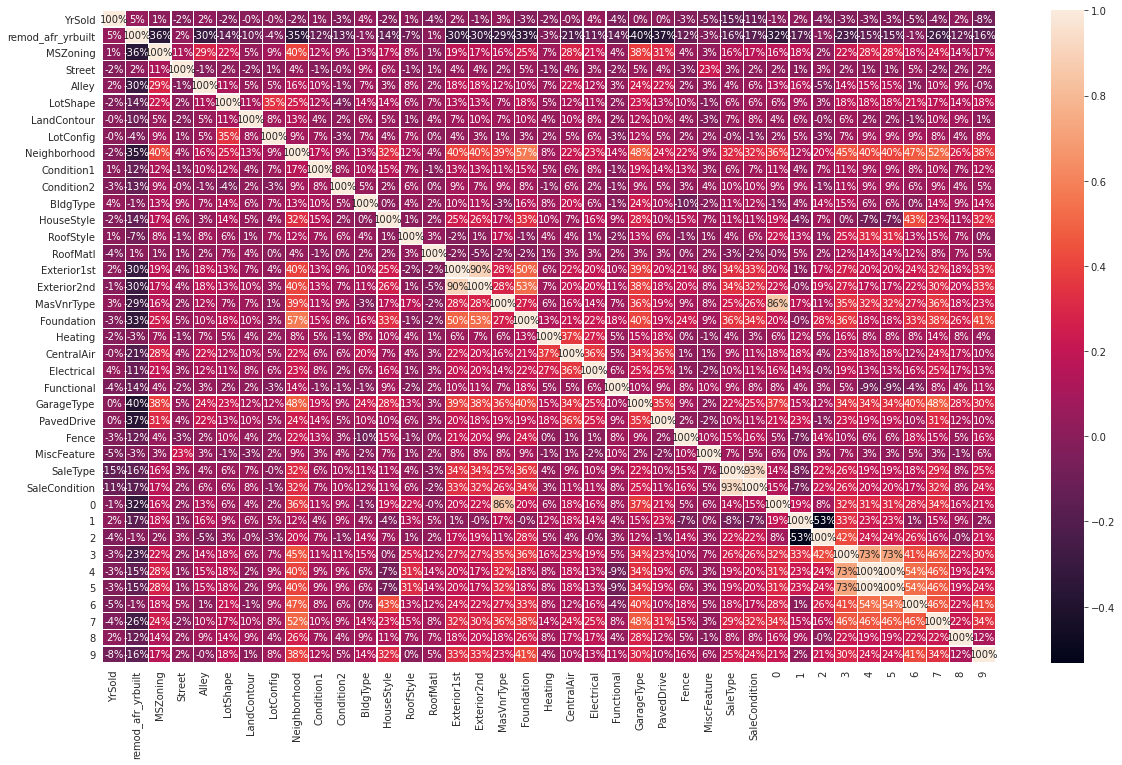

In [169]:
tst1=new_df2.iloc[:,41:]
plt.figure(figsize=(20,12))
sns.heatmap(tst1.corr(),annot=True,linewidths=0.2,fmt='0.0%')

In [170]:
# PoolArea ==PoolIQC
# BsmtFinTye2 == BsmtFinSF2
# Exterior1st == Exterior2nd
# MasVnrType == 0
# Sale tYpe = Sale condition
# 3==4
# 3==5

# 4==5 100

In [171]:
X=new_df2.drop(['PoolArea','BsmtFinSF2','SaleCondition',0,4,5],axis=1)
target=df['SalePrice']

In [172]:
pipeline_models(X,target)

Best Random State :  88
Best CV is : 9
Traning Score :  0.8433969412269203 


Cross Validate score is 76.71444836288391

Final accuracy is 88.24026995422335 

LinearRegression(fit_intercept=False, normalize=True)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

Best Random State :  184
Best CV is : 13
Traning Score :  0.9999999999953084 


Cross Validate score is 56.27224502442311

Final accuracy is 74.52189634165347 

KNeighborsRegressor(n_neighbors=9, weights='distance')

{'n_neighbors': 9, 'weights': 'distance'}

Best Random State :  0
Best CV is : 5
Traning Score :  -0.14015721084749866 


Cross Validate score is -5.527379301745152

Final accuracy is -11.773319324754672 

SVR(kernel='poly', max_iter=500)

{'gamma': 'scale', 'kernel': 'poly', 'max_iter': 500}

Best Random State :  182
Best CV is : 10
Traning Score :  0.9408149452669452 


Cross Validate score is 68.81731685357543

Final accuracy is 68.62381996057773 

DecisionTreeRegressor(criterion='mae', max_depth=7, 

'Best model name is :  LinearRegression()'

##  Observation 
#### Which model have all features with no skewness and scalled data model has gave best Output and Model is
### Linear  Regression

# Reading Test data and Predicting the Sale price

In [189]:
test_df=pd.read_csv("/home/pavankumar/data_sci_dec/internship_datasets/Project-Housing_splitted/test.csv")
test_df.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  

[2 rows x 80 columns]

### Imputing Null Values

<AxesSubplot:>

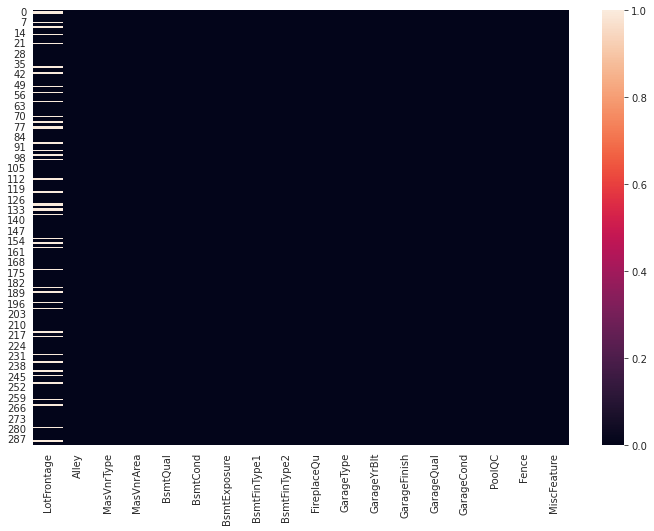

In [190]:
test_df["Alley"].replace(np.nan,"No Alley",inplace=True)
test_df["PoolQC"].replace(np.nan,"No Pool Present",inplace=True)
test_df["Fence"].replace(np.nan,"No Fence",inplace=True)
test_df["MiscFeature"].replace(np.nan,"All Covered",inplace=True)
for name in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    test_df[name].replace(np.nan,"No Basement",inplace=True)
for name in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    test_df[name].replace(np.nan,"No Garage",inplace=True)
test_df['GarageYrBlt'].replace(np.nan,int(0),inplace=True)
test_df['FireplaceQu'].replace(np.nan,'No Fireplace',inplace=True)
test_df['MasVnrType'].replace(np.nan,'None',inplace=True)
test_df['MasVnrArea'].replace(np.nan,0.0,inplace=True)

plt.figure(figsize=(12,8))
sns.heatmap(test_df[list(na_sum.index)].isna())

In [191]:
test_df['Electrical'].mode()

0    SBrkr
dtype: object

In [192]:
test_df['Electrical']=test_df['Electrical'].replace(np.nan,'SBrkr')

### Ecoding Categorical Variable

In [193]:
for col in test_df.select_dtypes('object').columns:
    test_df[col]=oe.fit_transform(pd.DataFrame(test_df[col]))

### Imputing null values in Categorical column by using KNN Imputer

In [194]:
test_df['LotFrontage']=knnim.fit_transform(pd.DataFrame(test_df['LotFrontage']))
test_df['LotFrontage']=test_df['LotFrontage'].astype('int')

### Removing Skewness

In [195]:
for i in continues_col:
    test_df[i]=pt.fit_transform(pd.DataFrame(test_df[i]))

### Applying Standard Scaller on contintues column

In [196]:
ss_df=ss.fit_transform(test_df[continues_col])
ss_df=pd.DataFrame(ss_df)
new_test_df=pd.concat([test_df.drop(continues_col,axis=1),ss_df],axis=1)

### Dropping Contant and no uniqness present columns

In [197]:
new_test_df.drop(['Id','Utilities'],axis=1,inplace=True)

### Features and Target column for Training the Model

In [198]:
X=new_df2.drop('remod_afr_yrbuilt',axis=1)
target=df['SalePrice']

### DecisionTree Regressor Model

In [199]:
dt=LinearRegression(normalize=True,copy_X=True)

In [200]:
dt.fit(X,target)

LinearRegression(normalize=True)

### Predicting Sale Prices

In [201]:
dt.predict(new_test_df)

array([-1.61735120e+07, -6.54303873e+06, -1.34822860e+07, -1.38959808e+07,
       -1.69509196e+07, -2.27230786e+06, -4.03946473e+06, -1.58906185e+07,
       -1.46151259e+07, -4.98514119e+06, -7.19518225e+06, -1.09291497e+07,
       -2.51412116e+07, -4.06935027e+07, -1.62516568e+07, -9.79433264e+06,
       -9.97709924e+06, -1.03853467e+07, -4.30297285e+06, -6.17049077e+06,
       -1.03577237e+07, -9.34304649e+06, -1.17960832e+07, -6.45148183e+06,
       -7.11481791e+06, -7.84523948e+06, -9.11572449e+06, -8.87101004e+06,
       -1.35448370e+07, -1.11393379e+07, -1.02925684e+07, -1.14769120e+07,
       -1.02821225e+07, -1.36070970e+07, -1.02852730e+07, -1.15110676e+07,
       -9.78922691e+06, -1.91560482e+06, -1.49557025e+07, -2.60271386e+06,
       -6.85130216e+06, -1.06394961e+07, -1.43154387e+07, -8.47149706e+06,
       -1.00099331e+07, -7.06807942e+06, -8.58548351e+06, -5.90799186e+06,
       -5.56582491e+06, -1.51883644e+07, -1.28016035e+07, -1.11608466e+07,
       -7.00352030e+06, -